# Importing and Cleaning Data



Authour: Shervin Zare
Date: "03/4/2024"

In [42]:
## Load Required Libraries
library(tidyverse)
library(tibble)
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)
library(readxl)
library(writexl)
library(openxlsx)
library(jsonlite)
library(stringr)
library(scales)


In this project, we will import four data sets from various file formats, and perform some tidying up of the imported data.
We will need to understand the structures of the data as we try to tidy them.

## 1) Import NOAA storm data (`.csv`) 

In [91]:
atl_cyclone_data_address <- "https://www.nhc.noaa.gov/data/hurdat/hurdat2-1851-2022-050423.txt"
(atl_cyclone_2022_raw <- atl_cyclone_data_address |> 
  
read_csv(col_names = c("1", "2", "3", "4")) 
)

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 55928 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): 1, 2, 3, 4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


1        2       3 
1     AL011851 UNNAMED 14
2     18510625 0000    NA
3     18510625 0600    NA
4     18510625 1200    NA
5     18510625 1800    NA
6     18510625 2100    L 
7     18510626 0000    NA
8     18510626 0600    NA
9     18510626 1200    NA
10    18510626 1800    NA
11    18510627 0000    NA
12    18510627 0600    NA
13    18510627 1200    NA
14    18510627 1800    NA
15    18510628 0000    NA
16    AL021851 UNNAMED 1 
17    18510705 1200    NA
18    AL031851 UNNAMED 1 
19    18510710 1200    NA
20    AL041851 UNNAMED 49
21    18510816 0000    NA
22    18510816 0600    NA
23    18510816 1200    NA
24    18510816 1800    NA
25    18510817 0000    NA
26    18510817 0600    NA
27    18510817 1200    NA
28    18510817 1800    NA
29    18510818 0000    NA
30    18510818 0600    NA
⋮     ⋮        ⋮       ⋮ 
55899 20221104 0600    NA
55900 20221104 1200    NA
55901 20221104 1800    NA
55902 AL172022 NICOLE  26
55903 20221106 1200    NA
55904 20221106 1800    NA
55905 20221107 0000    NA
55906 20221107 0600    NA
55907 20221107 1200    NA
55908 20221107 1800    NA
55909 20221108 0000    NA
55910 20221108 0600    NA
55911 20221108 1200    NA
55912 20221108 1800    NA
55913 20221109 0000    NA
55914 20221109 0600    NA
55915 20221109 1200    NA
55916 20221109 1700    L 
55917 20221109 1800    NA
55918 20221109 2300    L 
55919 20221110 0000    NA
55920 20221110 0600    NA
55921 20221110 0745    L 
55922 20221110 1200    NA
55923 20221110 1800    NA
55924 20221110 1900    L 
55925 20221111 0000    L 
55926 20221111 0600    NA
55927 20221111 1200    NA
55928 20221111 1800    NA
      4                                                                                                         
1     NA                                                                                                        
2     HU, 28.0N,  94.8W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
3     HU, 28.0N,  95.4W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
4     HU, 28.0N,  96.0W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
5     HU, 28.1N,  96.5W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
6     HU, 28.2N,  96.8W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
7     HU, 28.2N,  97.0W,  70, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
8     TS, 28.3N,  97.6W,  60, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
9     TS, 28.4N,  98.3W,  60, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
10    TS, 28.6N,  98.9W,  50, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
11    TS, 29.0N,  99.4W,  50, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
12    TS, 29.5N,  99.8W,  40, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
13    TS, 30.0N, 100.0W,  40, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
14    TS, 30.5N, 100.1W,  40, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
15    TS, 31.0N, 100.2W,  40, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
16    NA                                                                                                        
17    HU, 22.2N,  97.6W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
18    NA                                                                                                        
19    TS, 12.0N,  60.0W,  50, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999
20    NA                                                                                                        
21    TS, 13.4N,  48.

The format at least looks correct.
The column `4` definitely needs to be split into multiple columns.
Based on the documentation, the fields are separated by `,`, so we can use this to make the split.
The new column names, based on the documentation, are given in the `new_columns` variable.
It is also good practice to trim all the string values after separation.

In [44]:
new_columns <- c("status", "latitude", "longitude", "max_wind", "min_pressure", "NE_extend_34", "SE_extend_34", "SW_extend_34", "NW_extend_34", "NE_extend_50", "SE_extend_50", "SW_extend_50", "NW_extend_50", "NE_extend_64", "SE_extend_64", "SW_extend_64", "NW_extend_64", "r_max_wind"
)
(atl_cyclone_2022_update1 <- atl_cyclone_2022_raw |>
 
    separate(col = "4", into = new_columns, sep = "," ,extra = 'merge') |> 
  mutate(
    across(everything(), str_trim)
  )
)

1        2       3  status latitude longitude max_wind min_pressure
1     AL011851 UNNAMED 14 NA     NA       NA        NA       NA          
2     18510625 0000    NA HU     28.0N    94.8W     80       -999        
3     18510625 0600    NA HU     28.0N    95.4W     80       -999        
4     18510625 1200    NA HU     28.0N    96.0W     80       -999        
5     18510625 1800    NA HU     28.1N    96.5W     80       -999        
6     18510625 2100    L  HU     28.2N    96.8W     80       -999        
7     18510626 0000    NA HU     28.2N    97.0W     70       -999        
8     18510626 0600    NA TS     28.3N    97.6W     60       -999        
9     18510626 1200    NA TS     28.4N    98.3W     60       -999        
10    18510626 1800    NA TS     28.6N    98.9W     50       -999        
11    18510627 0000    NA TS     29.0N    99.4W     50       -999        
12    18510627 0600    NA TS     29.5N    99.8W     40       -999        
13    18510627 1200    NA TS     30.0N    100.0W    40       -999        
14    18510627 1800    NA TS     30.5N    100.1W    40       -999        
15    18510628 0000    NA TS     31.0N    100.2W    40       -999        
16    AL021851 UNNAMED 1  NA     NA       NA        NA       NA          
17    18510705 1200    NA HU     22.2N    97.6W     80       -999        
18    AL031851 UNNAMED 1  NA     NA       NA        NA       NA          
19    18510710 1200    NA TS     12.0N    60.0W     50       -999        
20    AL041851 UNNAMED 49 NA     NA       NA        NA       NA          
21    18510816 0000    NA TS     13.4N    48.0W     40       -999        
22    18510816 0600    NA TS     13.7N    49.5W     40       -999        
23    18510816 1200    NA TS     14.0N    51.0W     50       -999        
24    18510816 1800    NA TS     14.4N    52.8W     50       -999        
25    18510817 0000    NA TS     14.9N    54.6W     60       -999        
26    18510817 0600    NA TS     15.4N    56.5W     60       -999        
27    18510817 1200    NA HU     15.9N    58.5W     70       -999        
28    18510817 1800    NA HU     16.1N    60.4W     70       -999        
29    18510818 0000    NA HU     16.6N    62.5W     80       -999        
30    18510818 0600    NA HU     16.9N    64.1W     80       -999        
⋮     ⋮        ⋮       ⋮  ⋮      ⋮        ⋮         ⋮        ⋮           
55899 20221104 0600    NA EX     54.7N    37.7W     65       936         
55900 20221104 1200    NA EX     55.8N    37.2W     60       932         
55901 20221104 1800    NA EX     56.5N    36.5W     55       939         
55902 AL172022 NICOLE  26 NA     NA       NA        NA       NA          
55903 20221106 1200    NA LO     20.6N    66.8W     30       1005        
55904 20221106 1800    NA LO     22.4N    66.8W     35       1005        
55905 20221107 0000    NA LO     23.9N    67.5W     35       1005        
55906 20221107 0600    NA SS     25.2N    68.2W     40       1004        
55907 20221107 1200    NA SS     25.9N    69.3W     40       1002        
55908 20221107 1800    NA SS     26.4N    70.3W     40       1001        
55909 20221108 0000    NA SS     26.8N    70.7W     40       998         
55910 20221108 0600    NA SS     27.5N    71.2W     40       996         
55911 20221108 1200    NA SS     27.7N    72.1W     45       993         
55912 20221108 1800    NA TS     27.6N    73.3W     50       991         
55913 20221109 0000    NA TS     27.2N    74.3W     60       984         
55914 20221109 0600    NA TS     26.8N    75.3W     60       986         
55915 20221109 1200    NA TS     26.5N    76.2W     55       985         
55916 20221109 1700    L  TS     26.5N    77.1W     60       985         
55917 20221109 1800    NA TS     26.5N    77.3W     60       985         
55918 20221109 2300    L  HU     26.6N    78.2W     65       980         
55919 20221110 0000    NA HU     26.7N    78.4W     65       980         
55920 20221110 0600    NA HU     27.3N    79.8W     65       980         
55921 2022

We notice that many values are `-999`, which cannot be right.
Indeed, they denote missing values.
We should update the data frame to reflect this.

In [45]:
(atl_cyclone_2022_update2 <- atl_cyclone_2022_update1 |> 
 
  mutate(across(everything(), ~ifelse(. == "-999", NA, .)) 
  )
)

1        2       3  status latitude longitude max_wind min_pressure
1     AL011851 UNNAMED 14 NA     NA       NA        NA       NA          
2     18510625 0000    NA HU     28.0N    94.8W     80       NA          
3     18510625 0600    NA HU     28.0N    95.4W     80       NA          
4     18510625 1200    NA HU     28.0N    96.0W     80       NA          
5     18510625 1800    NA HU     28.1N    96.5W     80       NA          
6     18510625 2100    L  HU     28.2N    96.8W     80       NA          
7     18510626 0000    NA HU     28.2N    97.0W     70       NA          
8     18510626 0600    NA TS     28.3N    97.6W     60       NA          
9     18510626 1200    NA TS     28.4N    98.3W     60       NA          
10    18510626 1800    NA TS     28.6N    98.9W     50       NA          
11    18510627 0000    NA TS     29.0N    99.4W     50       NA          
12    18510627 0600    NA TS     29.5N    99.8W     40       NA          
13    18510627 1200    NA TS     30.0N    100.0W    40       NA          
14    18510627 1800    NA TS     30.5N    100.1W    40       NA          
15    18510628 0000    NA TS     31.0N    100.2W    40       NA          
16    AL021851 UNNAMED 1  NA     NA       NA        NA       NA          
17    18510705 1200    NA HU     22.2N    97.6W     80       NA          
18    AL031851 UNNAMED 1  NA     NA       NA        NA       NA          
19    18510710 1200    NA TS     12.0N    60.0W     50       NA          
20    AL041851 UNNAMED 49 NA     NA       NA        NA       NA          
21    18510816 0000    NA TS     13.4N    48.0W     40       NA          
22    18510816 0600    NA TS     13.7N    49.5W     40       NA          
23    18510816 1200    NA TS     14.0N    51.0W     50       NA          
24    18510816 1800    NA TS     14.4N    52.8W     50       NA          
25    18510817 0000    NA TS     14.9N    54.6W     60       NA          
26    18510817 0600    NA TS     15.4N    56.5W     60       NA          
27    18510817 1200    NA HU     15.9N    58.5W     70       NA          
28    18510817 1800    NA HU     16.1N    60.4W     70       NA          
29    18510818 0000    NA HU     16.6N    62.5W     80       NA          
30    18510818 0600    NA HU     16.9N    64.1W     80       NA          
⋮     ⋮        ⋮       ⋮  ⋮      ⋮        ⋮         ⋮        ⋮           
55899 20221104 0600    NA EX     54.7N    37.7W     65       936         
55900 20221104 1200    NA EX     55.8N    37.2W     60       932         
55901 20221104 1800    NA EX     56.5N    36.5W     55       939         
55902 AL172022 NICOLE  26 NA     NA       NA        NA       NA          
55903 20221106 1200    NA LO     20.6N    66.8W     30       1005        
55904 20221106 1800    NA LO     22.4N    66.8W     35       1005        
55905 20221107 0000    NA LO     23.9N    67.5W     35       1005        
55906 20221107 0600    NA SS     25.2N    68.2W     40       1004        
55907 20221107 1200    NA SS     25.9N    69.3W     40       1002        
55908 20221107 1800    NA SS     26.4N    70.3W     40       1001        
55909 20221108 0000    NA SS     26.8N    70.7W     40       998         
55910 20221108 0600    NA SS     27.5N    71.2W     40       996         
55911 20221108 1200    NA SS     27.7N    72.1W     45       993         
55912 20221108 1800    NA TS     27.6N    73.3W     50       991         
55913 20221109 0000    NA TS     27.2N    74.3W     60       984         
55914 20221109 0600    NA TS     26.8N    75.3W     60       986         
55915 20221109 1200    NA TS     26.5N    76.2W     55       985         
55916 20221109 1700    L  TS     26.5N    77.1W     60       985         
55917 20221109 1800    NA TS     26.5N    77.3W     60       985         
55918 20221109 2300    L  HU     26.6N    78.2W     65       980         
55919 20221110 0000    NA HU     26.7N    78.4W     65       980         
55920 20221110 0600    NA HU     27.3N    79.8W     65       980         
55921 2022

We look at this preliminary result.

In [46]:
tail(atl_cyclone_2022_update2, n=20)

1        2    3  status latitude longitude max_wind min_pressure
1  20221108 0000 NA SS     26.8N    70.7W     40       998         
2  20221108 0600 NA SS     27.5N    71.2W     40       996         
3  20221108 1200 NA SS     27.7N    72.1W     45       993         
4  20221108 1800 NA TS     27.6N    73.3W     50       991         
5  20221109 0000 NA TS     27.2N    74.3W     60       984         
6  20221109 0600 NA TS     26.8N    75.3W     60       986         
7  20221109 1200 NA TS     26.5N    76.2W     55       985         
8  20221109 1700 L  TS     26.5N    77.1W     60       985         
9  20221109 1800 NA TS     26.5N    77.3W     60       985         
10 20221109 2300 L  HU     26.6N    78.2W     65       980         
11 20221110 0000 NA HU     26.7N    78.4W     65       980         
12 20221110 0600 NA HU     27.3N    79.8W     65       980         
13 20221110 0745 L  HU     27.6N    80.3W     65       980         
14 20221110 1200 NA TS     28.0N    81.6W     55       984         
15 20221110 1800 NA TS     29.0N    82.8W     40       989         
16 20221110 1900 L  TS     29.2N    83.0W     40       989         
17 20221111 0000 L  TS     30.1N    84.0W     35       992         
18 20221111 0600 NA TD     31.2N    84.6W     30       996         
19 20221111 1200 NA TD     33.2N    84.6W     25       999         
20 20221111 1800 NA LO     35.4N    83.8W     25       1000        
   NE_extend_34 SE_extend_34 ⋯ NW_extend_34 NE_extend_50 SE_extend_50
1  270          270          ⋯ 180          0            0           
2  240          240          ⋯ 330          0            0           
3  240          240          ⋯ 330          0            0           
4  240          240          ⋯ 330          0            0           
5  300          240          ⋯ 330          0            0           
6  360          120          ⋯ 400          0            0           
7  360          120          ⋯ 400          20           0           
8  360          120          ⋯ 400          20           0           
9  420          80           ⋯ 390          20           0           
10 420          80           ⋯ 390          30           30          
11 420          80           ⋯ 390          30           30          
12 390          90           ⋯ 300          80           30          
13 390          90           ⋯ 300          80           30          
14 330          90           ⋯ 200          120          0           
15 200          60           ⋯ 130          0            0           
16 200          60           ⋯ 130          0            0           
17 200          60           ⋯ 100          0            0           
18 0            0            ⋯ 0            0            0           
19 0            0            ⋯ 0            0            0           
20 0            0            ⋯ 0            0            0           
   SW_extend_50 NW_extend_50 NE_extend_64 SE_extend_64 SW_extend_64
1  0            0            0            0            0           
2  0            0            0            0            0           
3  0            0            0            0            0           
4  0            60           0            0            0           
5  0            60           0            0            0           
6  0            60           0            0            0           
7  20           50           0            0            0           
8  20           50           0            0            0           
9  20           50           0            0            0           
10 20           50           20           20           0           
11 20           50           20           20           0           
12 20           80           20           20           0           
13 20           80           20           20           0           
14 0            0            0            0            0           
15 0            0            0            0            0           
16 0            0

We see that the identifying information for each cyclone is in a separate row, and the actual observation follows in the rows below.
This is not in tidy form and we should tidy it up.
We notice that the rows that contain only the identifying information miss values in the columns starting from `status`.
The process is to create three new columns with proper names to capture the identifying information of the storms.
Then propagate the values down so that each row corresponding to the same storm gets the same identifying information.
Lastly, get rid of the original rows that *DO NOT* contain any observations.

In [87]:
atl_cyclone_2022_update3 <- atl_cyclone_2022_update2 |>
    mutate(
    BasinNumberYear = if_else(is.na(status), `1`, NA),
    Name = if_else(is.na(latitude), `2`, NA), 
    Entries = if_else(is.na(latitude), `3`, NA)) |> 
  select(BasinNumberYear, Name, Entries, everything()) |> 
   fill(BasinNumberYear, Name, Entries) |>
  filter(!is.na(`status`)) 


Next, create the detailed date and time information for the observations, by splitting the columns `BasinNumberYear` and `1`.
Some cyclone gets named in one year (in column `BasinNumberYear`), while last long enough to the year after (in column `1`).
Thus we should distinguish the two different types of years.
The first one (from `BasinNumberYear`) will be `NameYear`, while the second one (from `1`) will be `ObservYear`.

In [88]:
(atl_cyclone_2022_update4 <- atl_cyclone_2022_update3 %>% 
  select(-Entries) %>%  # Due to the sanity check, `Entries` column is redundant
   
     separate_wider_position(cols = 3,
  c(ObservYear =4, Month = 2,Day = 2)
  ) %>% 
   separate_wider_position(cols = BasinNumberYear,
  c(Basin =2,Number = 2,NameYear = 4))) 

Basin Number NameYear Name    ObservYear Month Day 2    3  status ⋯
1     AL    01     1851     UNNAMED 1851       06    25  0000 NA HU     ⋯
2     AL    01     1851     UNNAMED 1851       06    25  0600 NA HU     ⋯
3     AL    01     1851     UNNAMED 1851       06    25  1200 NA HU     ⋯
4     AL    01     1851     UNNAMED 1851       06    25  1800 NA HU     ⋯
5     AL    01     1851     UNNAMED 1851       06    25  2100 L  HU     ⋯
6     AL    01     1851     UNNAMED 1851       06    26  0000 NA HU     ⋯
7     AL    01     1851     UNNAMED 1851       06    26  0600 NA TS     ⋯
8     AL    01     1851     UNNAMED 1851       06    26  1200 NA TS     ⋯
9     AL    01     1851     UNNAMED 1851       06    26  1800 NA TS     ⋯
10    AL    01     1851     UNNAMED 1851       06    27  0000 NA TS     ⋯
11    AL    01     1851     UNNAMED 1851       06    27  0600 NA TS     ⋯
12    AL    01     1851     UNNAMED 1851       06    27  1200 NA TS     ⋯
13    AL    01     1851     UNNAMED 1851       06    27  1800 NA TS     ⋯
14    AL    01     1851     UNNAMED 1851       06    28  0000 NA TS     ⋯
15    AL    02     1851     UNNAMED 1851       07    05  1200 NA HU     ⋯
16    AL    03     1851     UNNAMED 1851       07    10  1200 NA TS     ⋯
17    AL    04     1851     UNNAMED 1851       08    16  0000 NA TS     ⋯
18    AL    04     1851     UNNAMED 1851       08    16  0600 NA TS     ⋯
19    AL    04     1851     UNNAMED 1851       08    16  1200 NA TS     ⋯
20    AL    04     1851     UNNAMED 1851       08    16  1800 NA TS     ⋯
21    AL    04     1851     UNNAMED 1851       08    17  0000 NA TS     ⋯
22    AL    04     1851     UNNAMED 1851       08    17  0600 NA TS     ⋯
23    AL    04     1851     UNNAMED 1851       08    17  1200 NA HU     ⋯
24    AL    04     1851     UNNAMED 1851       08    17  1800 NA HU     ⋯
25    AL    04     1851     UNNAMED 1851       08    18  0000 NA HU     ⋯
26    AL    04     1851     UNNAMED 1851       08    18  0600 NA HU     ⋯
27    AL    04     1851     UNNAMED 1851       08    18  1200 NA HU     ⋯
28    AL    04     1851     UNNAMED 1851       08    18  1800 NA HU     ⋯
29    AL    04     1851     UNNAMED 1851       08    19  0000 NA HU     ⋯
30    AL    04     1851     UNNAMED 1851       08    19  0600 NA HU     ⋯
⋮     ⋮     ⋮      ⋮        ⋮       ⋮          ⋮     ⋮   ⋮    ⋮  ⋮      ⋱
53947 AL    16     2022     MARTIN  2022       11    04  0000 NA EX     ⋯
53948 AL    16     2022     MARTIN  2022       11    04  0600 NA EX     ⋯
53949 AL    16     2022     MARTIN  2022       11    04  1200 NA EX     ⋯
53950 AL    16     2022     MARTIN  2022       11    04  1800 NA EX     ⋯
53951 AL    17     2022     NICOLE  2022       11    06  1200 NA LO     ⋯
53952 AL    17     2022     NICOLE  2022       11    06  1800 NA LO     ⋯
53953 AL    17     2022     NICOLE  2022       11    07  0000 NA LO     ⋯
53954 AL    17     2022     NICOLE  2022       11    07  0600 NA SS     ⋯
53955 AL    17     2022     NICOLE  2022       11    07  1200 NA SS     ⋯
53956 AL    17     2022     NICOLE  2022       11    07  1800 NA SS     ⋯
53957 AL    17     2022     NICOLE  2022       11    08  0000 NA SS     ⋯
53958 AL    17     2022     NICOLE  2022       11    08  0600 NA SS     ⋯
53959 AL    17     2022     NICOLE  2022       11    08  1200 NA SS     ⋯
53960 AL    17     2022     NICOLE  2022       11    08  1800 NA TS     ⋯
53961 AL    17     2022     NICOLE  2022       11    09  0000 NA TS     ⋯
53962 AL    17     2022     NICOLE  2022       11    09  0600 NA TS     ⋯
53963 AL    17     2022     NICOLE  2022       11    09  1200 NA TS     ⋯
53964 AL    17     2022     NICOLE  2022       11    09  1700 L  TS     ⋯
53965 AL    17     2022     NICOLE  2022       11    09  1800 NA TS     ⋯
53966 AL    17     2022     NICOLE  2022       11    09  2300 L  HU     ⋯
53967 AL    17     2022     NICOLE  2022       11    10  0000 NA HU     ⋯
53968 AL    17     2022     NICOLE  2022       11    10  0600 NA HU     ⋯
53969 AL  

We can see that indeed there are cyclones that went across years.


In [49]:
atl_cyclone_2022_update4 |>
  filter(NameYear != `ObservYear`) 

Basin Number NameYear Name  ObservYear Month Day 2    3  status ⋯
1  AL    16     1954     ALICE 1955       01    01  0000 NA HU     ⋯
2  AL    16     1954     ALICE 1955       01    01  0600 NA HU     ⋯
3  AL    16     1954     ALICE 1955       01    01  1200 NA HU     ⋯
4  AL    16     1954     ALICE 1955       01    01  1800 NA HU     ⋯
5  AL    16     1954     ALICE 1955       01    02  0000 NA HU     ⋯
6  AL    16     1954     ALICE 1955       01    02  0600 NA HU     ⋯
7  AL    16     1954     ALICE 1955       01    02  1200 NA HU     ⋯
8  AL    16     1954     ALICE 1955       01    02  1800 NA HU     ⋯
9  AL    16     1954     ALICE 1955       01    02  2100 L  HU     ⋯
10 AL    16     1954     ALICE 1955       01    03  0000 NA TS     ⋯
11 AL    16     1954     ALICE 1955       01    03  0600 NA TS     ⋯
12 AL    16     1954     ALICE 1955       01    03  1200 NA TS     ⋯
13 AL    16     1954     ALICE 1955       01    03  1800 NA TS     ⋯
14 AL    16     1954     ALICE 1955       01    04  0000 NA TS     ⋯
15 AL    16     1954     ALICE 1955       01    04  0600 NA TS     ⋯
16 AL    16     1954     ALICE 1955       01    04  1200 NA TS     ⋯
17 AL    16     1954     ALICE 1955       01    04  1800 NA TS     ⋯
18 AL    16     1954     ALICE 1955       01    05  0000 NA TS     ⋯
19 AL    16     1954     ALICE 1955       01    05  0600 NA TD     ⋯
20 AL    16     1954     ALICE 1955       01    05  1200 NA TD     ⋯
21 AL    16     1954     ALICE 1955       01    05  1800 NA TD     ⋯
22 AL    16     1954     ALICE 1955       01    06  0000 NA TD     ⋯
23 AL    31     2005     ZETA  2006       01    01  0000 NA TS     ⋯
24 AL    31     2005     ZETA  2006       01    01  0600 NA TS     ⋯
25 AL    31     2005     ZETA  2006       01    01  1200 NA TS     ⋯
26 AL    31     2005     ZETA  2006       01    01  1800 NA TS     ⋯
27 AL    31     2005     ZETA  2006       01    02  0000 NA TS     ⋯
28 AL    31     2005     ZETA  2006       01    02  0600 NA TS     ⋯
29 AL    31     2005     ZETA  2006       01    02  1200 NA TS     ⋯
30 AL    31     2005     ZETA  2006       01    02  1800 NA TS     ⋯
31 AL    31     2005     ZETA  2006       01    03  0000 NA TS     ⋯
32 AL    31     2005     ZETA  2006       01    03  0600 NA TS     ⋯
33 AL    31     2005     ZETA  2006       01    03  1200 NA TS     ⋯
34 AL    31     2005     ZETA  2006       01    03  1800 NA TS     ⋯
35 AL    31     2005     ZETA  2006       01    04  0000 NA TS     ⋯
36 AL    31     2005     ZETA  2006       01    04  0600 NA TS     ⋯
37 AL    31     2005     ZETA  2006       01    04  1200 NA TS     ⋯
38 AL    31     2005     ZETA  2006       01    04  1800 NA TS     ⋯
39 AL    31     2005     ZETA  2006       01    05  0000 NA TS     ⋯
40 AL    31     2005     ZETA  2006       01    05  0600 NA TS     ⋯
41 AL    31     2005     ZETA  2006       01    05  1200 NA TS     ⋯
42 AL    31     2005     ZETA  2006       01    05  1800 NA TS     ⋯
43 AL    31     2005     ZETA  2006       01    06  0000 NA TS     ⋯
44 AL    31     2005     ZETA  2006       01    06  0600 NA TD     ⋯
45 AL    31     2005     ZETA  2006       01    06  1200 NA TD     ⋯
46 AL    31     2005     ZETA  2006       01    06  1800 NA LO     ⋯
47 AL    31     2005     ZETA  2006       01    07  0000 NA LO     ⋯
48 AL    31     2005     ZETA  2006       01    07  0600 NA LO     ⋯
49 AL    31     2005     ZETA  2006       01    07  1200 NA LO     ⋯
50 AL    31     2005     ZETA  2006       01    07  1800 NA LO     ⋯
   NW_extend_34 NE_extend_50 SE_extend_50 SW_extend_50 NW_extend_50
1  NA           NA           NA           NA           NA          
2  NA           NA           NA           NA           NA          
3  NA           NA           NA           NA           NA          
4  NA           NA           NA           NA           NA          
5  NA           NA           NA           NA           NA          
6  NA           NA           NA           NA           NA          
7  NA   

Now we can finish reassign the column names and types according to the data description.
First, we should separate column `2` into `Hour` and `Minute`, and rename column `3` to the more meaningful `Identifier`, according to the documentation.


In [92]:
(atl_cyclone_2022_update5 <- atl_cyclone_2022_update4 %>% 
   
    separate_wider_position(cols = 8,
  c(Hour = 2, Minute = 2)
  ) %>% 
    
   rename('Identifier' = '3')
)

Basin Number NameYear Name    ObservYear Month Day Hour Minute Identifier
1     AL    01     1851     UNNAMED 1851       06    25  00   00     NA        
2     AL    01     1851     UNNAMED 1851       06    25  06   00     NA        
3     AL    01     1851     UNNAMED 1851       06    25  12   00     NA        
4     AL    01     1851     UNNAMED 1851       06    25  18   00     NA        
5     AL    01     1851     UNNAMED 1851       06    25  21   00     L         
6     AL    01     1851     UNNAMED 1851       06    26  00   00     NA        
7     AL    01     1851     UNNAMED 1851       06    26  06   00     NA        
8     AL    01     1851     UNNAMED 1851       06    26  12   00     NA        
9     AL    01     1851     UNNAMED 1851       06    26  18   00     NA        
10    AL    01     1851     UNNAMED 1851       06    27  00   00     NA        
11    AL    01     1851     UNNAMED 1851       06    27  06   00     NA        
12    AL    01     1851     UNNAMED 1851       06    27  12   00     NA        
13    AL    01     1851     UNNAMED 1851       06    27  18   00     NA        
14    AL    01     1851     UNNAMED 1851       06    28  00   00     NA        
15    AL    02     1851     UNNAMED 1851       07    05  12   00     NA        
16    AL    03     1851     UNNAMED 1851       07    10  12   00     NA        
17    AL    04     1851     UNNAMED 1851       08    16  00   00     NA        
18    AL    04     1851     UNNAMED 1851       08    16  06   00     NA        
19    AL    04     1851     UNNAMED 1851       08    16  12   00     NA        
20    AL    04     1851     UNNAMED 1851       08    16  18   00     NA        
21    AL    04     1851     UNNAMED 1851       08    17  00   00     NA        
22    AL    04     1851     UNNAMED 1851       08    17  06   00     NA        
23    AL    04     1851     UNNAMED 1851       08    17  12   00     NA        
24    AL    04     1851     UNNAMED 1851       08    17  18   00     NA        
25    AL    04     1851     UNNAMED 1851       08    18  00   00     NA        
26    AL    04     1851     UNNAMED 1851       08    18  06   00     NA        
27    AL    04     1851     UNNAMED 1851       08    18  12   00     NA        
28    AL    04     1851     UNNAMED 1851       08    18  18   00     NA        
29    AL    04     1851     UNNAMED 1851       08    19  00   00     NA        
30    AL    04     1851     UNNAMED 1851       08    19  06   00     NA        
⋮     ⋮     ⋮      ⋮        ⋮       ⋮          ⋮     ⋮   ⋮    ⋮      ⋮         
53947 AL    16     2022     MARTIN  2022       11    04  00   00     NA        
53948 AL    16     2022     MARTIN  2022       11    04  06   00     NA        
53949 AL    16     2022     MARTIN  2022       11    04  12   00     NA        
53950 AL    16     2022     MARTIN  2022       11    04  18   00     NA        
53951 AL    17     2022     NICOLE  2022       11    06  12   00     NA        
53952 AL    17     2022     NICOLE  2022       11    06  18   00     NA        
53953 AL    17     2022     NICOLE  2022       11    07  00   00     NA        
53954 AL    17     2022     NICOLE  2022       11    07  06   00     NA        
53955 AL    17     2022     NICOLE  2022       11    07  12   00     NA        
53956 AL    17     2022     NICOLE  2022       11    07  18   00     NA        
53957 AL    17     2022     NICOLE  2022       11    08  00   00     NA        
53958 AL    17     2022     NICOLE  2022       11    08  06   00     NA        
53959 AL    17     2022     NICOLE  2022       11    08  12   00     NA        
53960 AL    17     2022     NICOLE  2022       11    08  18   00     NA        
53961 AL    17     2022     NICOLE  2022       11    09  00   00     NA        
53962 AL    17     2022     NICOLE  2022       11    09  06   00     NA        
53963 AL    17     2022     NICOLE  2022       11    09  12   00     NA        
53964 AL    17     2022     NICOLE  2022       11    09  17   00     L         
53965 

Then we parse the obvious numeric columns to the correct types.
The columns `NameYear`, `ObservYear`, `Month`, `Day`, `Hour`, `Minute`, and `Number` should be integers, while the columns starting with `max_wind` should be doubles.

In [51]:
(atl_cyclone_2022_tidy <- atl_cyclone_2022_update5 |> 
  
   mutate(across(c(max_wind: r_max_wind), as.double)) |> 
   mutate(across(c(NameYear, ObservYear, Month, Day, Hour, Minute, Number), as.numeric))
 
)

Basin Number NameYear Name    ObservYear Month Day Hour Minute Identifier
1     AL    1      1851     UNNAMED 1851       6     25   0   0      NA        
2     AL    1      1851     UNNAMED 1851       6     25   6   0      NA        
3     AL    1      1851     UNNAMED 1851       6     25  12   0      NA        
4     AL    1      1851     UNNAMED 1851       6     25  18   0      NA        
5     AL    1      1851     UNNAMED 1851       6     25  21   0      L         
6     AL    1      1851     UNNAMED 1851       6     26   0   0      NA        
7     AL    1      1851     UNNAMED 1851       6     26   6   0      NA        
8     AL    1      1851     UNNAMED 1851       6     26  12   0      NA        
9     AL    1      1851     UNNAMED 1851       6     26  18   0      NA        
10    AL    1      1851     UNNAMED 1851       6     27   0   0      NA        
11    AL    1      1851     UNNAMED 1851       6     27   6   0      NA        
12    AL    1      1851     UNNAMED 1851       6     27  12   0      NA        
13    AL    1      1851     UNNAMED 1851       6     27  18   0      NA        
14    AL    1      1851     UNNAMED 1851       6     28   0   0      NA        
15    AL    2      1851     UNNAMED 1851       7      5  12   0      NA        
16    AL    3      1851     UNNAMED 1851       7     10  12   0      NA        
17    AL    4      1851     UNNAMED 1851       8     16   0   0      NA        
18    AL    4      1851     UNNAMED 1851       8     16   6   0      NA        
19    AL    4      1851     UNNAMED 1851       8     16  12   0      NA        
20    AL    4      1851     UNNAMED 1851       8     16  18   0      NA        
21    AL    4      1851     UNNAMED 1851       8     17   0   0      NA        
22    AL    4      1851     UNNAMED 1851       8     17   6   0      NA        
23    AL    4      1851     UNNAMED 1851       8     17  12   0      NA        
24    AL    4      1851     UNNAMED 1851       8     17  18   0      NA        
25    AL    4      1851     UNNAMED 1851       8     18   0   0      NA        
26    AL    4      1851     UNNAMED 1851       8     18   6   0      NA        
27    AL    4      1851     UNNAMED 1851       8     18  12   0      NA        
28    AL    4      1851     UNNAMED 1851       8     18  18   0      NA        
29    AL    4      1851     UNNAMED 1851       8     19   0   0      NA        
30    AL    4      1851     UNNAMED 1851       8     19   6   0      NA        
⋮     ⋮     ⋮      ⋮        ⋮       ⋮          ⋮     ⋮   ⋮    ⋮      ⋮         
53947 AL    16     2022     MARTIN  2022       11     4   0    0     NA        
53948 AL    16     2022     MARTIN  2022       11     4   6    0     NA        
53949 AL    16     2022     MARTIN  2022       11     4  12    0     NA        
53950 AL    16     2022     MARTIN  2022       11     4  18    0     NA        
53951 AL    17     2022     NICOLE  2022       11     6  12    0     NA        
53952 AL    17     2022     NICOLE  2022       11     6  18    0     NA        
53953 AL    17     2022     NICOLE  2022       11     7   0    0     NA        
53954 AL    17     2022     NICOLE  2022       11     7   6    0     NA        
53955 AL    17     2022     NICOLE  2022       11     7  12    0     NA        
53956 AL    17     2022     NICOLE  2022       11     7  18    0     NA        
53957 AL    17     2022     NICOLE  2022       11     8   0    0     NA        
53958 AL    17     2022     NICOLE  2022       11     8   6    0     NA        
53959 AL    17     2022     NICOLE  2022       11     8  12    0     NA        
53960 AL    17     2022     NICOLE  2022       11     8  18    0     NA        
53961 AL    17     2022     NICOLE  2022       11     9   0    0     NA        
53962 AL    17     2022     NICOLE  2022       11     9   6    0     NA        
53963 AL    17     2022     NICOLE  2022       11     9  12    0     NA        
53964 AL    17     2022     NICOLE  2022       11     9  17    0     L         
53965 

Have now a tidy data set.
Let's look at the `max_wind`, by sorting it from smallest to largest.

In [93]:
atl_cyclone_2022_tidy |>
  arrange(max_wind) |>
  select(max_wind, everything())

max_wind Basin Number NameYear Name    ObservYear Month Day Hour Minute ⋯
1     -99      AL     2     1971     UNNAMED 1971        7     8  12   0      ⋯
2     -99      AL     3     1971     UNNAMED 1971        7    11  12   0      ⋯
3     -99      AL     5     1971     UNNAMED 1971        8     9  12   0      ⋯
4     -99      AL     7     1971     UNNAMED 1971        8    16  12   0      ⋯
5     -99      AL    10     1971     UNNAMED 1971        9     1  12   0      ⋯
6     -99      AL    15     1971     UNNAMED 1971        9    11  12   0      ⋯
7     -99      AL    20     1971     UNNAMED 1971       10    14  12   0      ⋯
8     -99      AL     4     1972     UNNAMED 1972        7    12  18   0      ⋯
9     -99      AL     7     1972     UNNAMED 1972        8     5  12   0      ⋯
10    -99      AL    11     1973     UNNAMED 1973        9     9   6   0      ⋯
11    -99      AL    11     1973     UNNAMED 1973        9     9  12   0      ⋯
12    -99      AL    11     1973     UNNAMED 1973        9    12  12   0      ⋯
13    -99      AL    13     1973     UNNAMED 1973        9    26  12   0      ⋯
14    -99      AL    17     1973     UNNAMED 1973       11    18  18   0      ⋯
15    -99      AL     3     1974     UNNAMED 1974        6    30  12   0      ⋯
16    -99      AL     4     1974     UNNAMED 1974        7    17  18   0      ⋯
17    -99      AL     8     1974     UNNAMED 1974        8    26  12   0      ⋯
18    -99      AL    16     1974     UNNAMED 1974        9    27  12   0      ⋯
19    -99      AL     5     1975     UNNAMED 1975        7    26  18   0      ⋯
20    -99      AL     6     1975     UNNAMED 1975        7    30  12   0      ⋯
21    -99      AL    11     1975     UNNAMED 1975        9     7  18   0      ⋯
22    -99      AL    16     1975     UNNAMED 1975        9    29  12   0      ⋯
23    -99      AL    18     1975     UNNAMED 1975       10    17  12   0      ⋯
24    -99      AL    20     1975     UNNAMED 1975       10    29  18   0      ⋯
25    -99      AL    21     1975     UNNAMED 1975       11    12  18   0      ⋯
26    -99      AL    16     1976     UNNAMED 1976        9    24  18   0      ⋯
27    -99      AL    19     1976     UNNAMED 1976       10    12   6   0      ⋯
28    -99      AL     1     1977     UNNAMED 1977        6    14  18   0      ⋯
29    -99      AL     2     1977     UNNAMED 1977        7    19  12   0      ⋯
30    -99      AL     9     1977     UNNAMED 1977        9    23  12   0      ⋯
⋮     ⋮        ⋮     ⋮      ⋮        ⋮       ⋮          ⋮     ⋮   ⋮    ⋮      ⋱
53947 150      AL    11     2017     IRMA    2017        9     7   0    0     ⋯
53948 150      AL    15     2017     MARIA   2017        9    20   0    0     ⋯
53949 150      AL    15     2017     MARIA   2017        9    20   3    0     ⋯
53950 155      AL     4     1980     ALLEN   1980        8     5  12    0     ⋯
53951 155      AL     4     1980     ALLEN   1980        8     7  12    0     ⋯
53952 155      AL     4     1980     ALLEN   1980        8     8   0    0     ⋯
53953 155      AL     4     1980     ALLEN   1980        8     9   6    0     ⋯
53954 155      AL     8     1988     GILBERT 1988        9    14   6    0     ⋯
53955 155      AL    13     1998     MITCH   1998       10    26  18    0     ⋯
53956 155      AL    13     1998     MITCH   1998       10    27   0    0     ⋯
53957 155      AL    18     2005     RITA    2005        9    22   3    0     ⋯
53958 155      AL    18     2005     RITA    2005        9    22   6    0     ⋯
53959 155      AL    11     2017     IRMA    2017        9     5  18    0     ⋯
53960 155      AL    11     2017     IRMA    2017        9     6   0    0     ⋯
53961 155      AL    11     2017     IRMA    2017        9     6   5   45     ⋯
53962 155      AL    11     2017     IRMA    2017        9     6   6    0     ⋯
53963 155      AL    11     2017     IRMA    2017        9     6  11   15     ⋯
53964 155      AL    11     2017     IRMA    2017        9     6  12    0     ⋯
53965 

It turns out that there are rows with `-99` as values for `max_wind`!
It cannot be reasonable and must represent missing values.
We should update it once more to convert all the `-99` values to `NA`.

In [94]:
(atl_cyclone_2022 <- atl_cyclone_2022_tidy |> 
 
   mutate(across(max_wind, ~na_if(., -99))) |>
   relocate(max_wind, .before = "Basin")
)


max_wind Basin Number NameYear Name    ObservYear Month Day Hour Minute ⋯
1     80       AL    1      1851     UNNAMED 1851       6     25   0   0      ⋯
2     80       AL    1      1851     UNNAMED 1851       6     25   6   0      ⋯
3     80       AL    1      1851     UNNAMED 1851       6     25  12   0      ⋯
4     80       AL    1      1851     UNNAMED 1851       6     25  18   0      ⋯
5     80       AL    1      1851     UNNAMED 1851       6     25  21   0      ⋯
6     70       AL    1      1851     UNNAMED 1851       6     26   0   0      ⋯
7     60       AL    1      1851     UNNAMED 1851       6     26   6   0      ⋯
8     60       AL    1      1851     UNNAMED 1851       6     26  12   0      ⋯
9     50       AL    1      1851     UNNAMED 1851       6     26  18   0      ⋯
10    50       AL    1      1851     UNNAMED 1851       6     27   0   0      ⋯
11    40       AL    1      1851     UNNAMED 1851       6     27   6   0      ⋯
12    40       AL    1      1851     UNNAMED 1851       6     27  12   0      ⋯
13    40       AL    1      1851     UNNAMED 1851       6     27  18   0      ⋯
14    40       AL    1      1851     UNNAMED 1851       6     28   0   0      ⋯
15    80       AL    2      1851     UNNAMED 1851       7      5  12   0      ⋯
16    50       AL    3      1851     UNNAMED 1851       7     10  12   0      ⋯
17    40       AL    4      1851     UNNAMED 1851       8     16   0   0      ⋯
18    40       AL    4      1851     UNNAMED 1851       8     16   6   0      ⋯
19    50       AL    4      1851     UNNAMED 1851       8     16  12   0      ⋯
20    50       AL    4      1851     UNNAMED 1851       8     16  18   0      ⋯
21    60       AL    4      1851     UNNAMED 1851       8     17   0   0      ⋯
22    60       AL    4      1851     UNNAMED 1851       8     17   6   0      ⋯
23    70       AL    4      1851     UNNAMED 1851       8     17  12   0      ⋯
24    70       AL    4      1851     UNNAMED 1851       8     17  18   0      ⋯
25    80       AL    4      1851     UNNAMED 1851       8     18   0   0      ⋯
26    80       AL    4      1851     UNNAMED 1851       8     18   6   0      ⋯
27    90       AL    4      1851     UNNAMED 1851       8     18  12   0      ⋯
28    90       AL    4      1851     UNNAMED 1851       8     18  18   0      ⋯
29    90       AL    4      1851     UNNAMED 1851       8     19   0   0      ⋯
30    70       AL    4      1851     UNNAMED 1851       8     19   6   0      ⋯
⋮     ⋮        ⋮     ⋮      ⋮        ⋮       ⋮          ⋮     ⋮   ⋮    ⋮      ⋱
53947 70       AL    16     2022     MARTIN  2022       11     4   0    0     ⋯
53948 65       AL    16     2022     MARTIN  2022       11     4   6    0     ⋯
53949 60       AL    16     2022     MARTIN  2022       11     4  12    0     ⋯
53950 55       AL    16     2022     MARTIN  2022       11     4  18    0     ⋯
53951 30       AL    17     2022     NICOLE  2022       11     6  12    0     ⋯
53952 35       AL    17     2022     NICOLE  2022       11     6  18    0     ⋯
53953 35       AL    17     2022     NICOLE  2022       11     7   0    0     ⋯
53954 40       AL    17     2022     NICOLE  2022       11     7   6    0     ⋯
53955 40       AL    17     2022     NICOLE  2022       11     7  12    0     ⋯
53956 40       AL    17     2022     NICOLE  2022       11     7  18    0     ⋯
53957 40       AL    17     2022     NICOLE  2022       11     8   0    0     ⋯
53958 40       AL    17     2022     NICOLE  2022       11     8   6    0     ⋯
53959 45       AL    17     2022     NICOLE  2022       11     8  12    0     ⋯
53960 50       AL    17     2022     NICOLE  2022       11     8  18    0     ⋯
53961 60       AL    17     2022     NICOLE  2022       11     9   0    0     ⋯
53962 60       AL    17     2022     NICOLE  2022       11     9   6    0     ⋯
53963 55       AL    17     2022     NICOLE  2022       11     9  12    0     ⋯
53964 60       AL    17     2022     NICOLE  2022       11     9  17    0     ⋯
53965 

We verify that indeed `-99` becomes `NA`:

In [95]:

atl_cyclone_2022 |>
  filter(Basin == "AL", Number == 3, NameYear == 1971)

max_wind Basin Number NameYear Name    ObservYear Month Day Hour Minute ⋯
1 20       AL    3      1971     UNNAMED 1971       7     10  12   0      ⋯
2 25       AL    3      1971     UNNAMED 1971       7     10  18   0      ⋯
3 25       AL    3      1971     UNNAMED 1971       7     11   0   0      ⋯
4 25       AL    3      1971     UNNAMED 1971       7     11   6   0      ⋯
5 NA       AL    3      1971     UNNAMED 1971       7     11  12   0      ⋯
  NW_extend_34 NE_extend_50 SE_extend_50 SW_extend_50 NW_extend_50 NE_extend_64
1 NA           NA           NA           NA           NA           NA          
2 NA           NA           NA           NA           NA           NA          
3 NA           NA           NA           NA           NA           NA          
4 NA           NA           NA           NA           NA           NA          
5 NA           NA           NA           NA           NA           NA          
  SE_extend_64 SW_extend_64 NW_extend_64 r_max_wind
1 NA           NA           NA           NA        
2 NA           NA           NA           NA        
3 NA           NA           NA           NA        
4 NA           NA           NA           NA        
5 NA           NA           NA           NA

The data is in much better shape and we should save all the work as a `parquet` file, so that we do not have to go through the whole process again.

In [96]:
library(arrow)
save_name <- "hurdat2-1851-2022.parquet"

write_parquet(atl_cyclone_2022, save_name)

Then we read it back just to make sure:

In [97]:
read_parquet(save_name)

max_wind Basin Number NameYear Name    ObservYear Month Day Hour Minute ⋯
1     80       AL    1      1851     UNNAMED 1851       6     25   0   0      ⋯
2     80       AL    1      1851     UNNAMED 1851       6     25   6   0      ⋯
3     80       AL    1      1851     UNNAMED 1851       6     25  12   0      ⋯
4     80       AL    1      1851     UNNAMED 1851       6     25  18   0      ⋯
5     80       AL    1      1851     UNNAMED 1851       6     25  21   0      ⋯
6     70       AL    1      1851     UNNAMED 1851       6     26   0   0      ⋯
7     60       AL    1      1851     UNNAMED 1851       6     26   6   0      ⋯
8     60       AL    1      1851     UNNAMED 1851       6     26  12   0      ⋯
9     50       AL    1      1851     UNNAMED 1851       6     26  18   0      ⋯
10    50       AL    1      1851     UNNAMED 1851       6     27   0   0      ⋯
11    40       AL    1      1851     UNNAMED 1851       6     27   6   0      ⋯
12    40       AL    1      1851     UNNAMED 1851       6     27  12   0      ⋯
13    40       AL    1      1851     UNNAMED 1851       6     27  18   0      ⋯
14    40       AL    1      1851     UNNAMED 1851       6     28   0   0      ⋯
15    80       AL    2      1851     UNNAMED 1851       7      5  12   0      ⋯
16    50       AL    3      1851     UNNAMED 1851       7     10  12   0      ⋯
17    40       AL    4      1851     UNNAMED 1851       8     16   0   0      ⋯
18    40       AL    4      1851     UNNAMED 1851       8     16   6   0      ⋯
19    50       AL    4      1851     UNNAMED 1851       8     16  12   0      ⋯
20    50       AL    4      1851     UNNAMED 1851       8     16  18   0      ⋯
21    60       AL    4      1851     UNNAMED 1851       8     17   0   0      ⋯
22    60       AL    4      1851     UNNAMED 1851       8     17   6   0      ⋯
23    70       AL    4      1851     UNNAMED 1851       8     17  12   0      ⋯
24    70       AL    4      1851     UNNAMED 1851       8     17  18   0      ⋯
25    80       AL    4      1851     UNNAMED 1851       8     18   0   0      ⋯
26    80       AL    4      1851     UNNAMED 1851       8     18   6   0      ⋯
27    90       AL    4      1851     UNNAMED 1851       8     18  12   0      ⋯
28    90       AL    4      1851     UNNAMED 1851       8     18  18   0      ⋯
29    90       AL    4      1851     UNNAMED 1851       8     19   0   0      ⋯
30    70       AL    4      1851     UNNAMED 1851       8     19   6   0      ⋯
⋮     ⋮        ⋮     ⋮      ⋮        ⋮       ⋮          ⋮     ⋮   ⋮    ⋮      ⋱
53947 70       AL    16     2022     MARTIN  2022       11     4   0    0     ⋯
53948 65       AL    16     2022     MARTIN  2022       11     4   6    0     ⋯
53949 60       AL    16     2022     MARTIN  2022       11     4  12    0     ⋯
53950 55       AL    16     2022     MARTIN  2022       11     4  18    0     ⋯
53951 30       AL    17     2022     NICOLE  2022       11     6  12    0     ⋯
53952 35       AL    17     2022     NICOLE  2022       11     6  18    0     ⋯
53953 35       AL    17     2022     NICOLE  2022       11     7   0    0     ⋯
53954 40       AL    17     2022     NICOLE  2022       11     7   6    0     ⋯
53955 40       AL    17     2022     NICOLE  2022       11     7  12    0     ⋯
53956 40       AL    17     2022     NICOLE  2022       11     7  18    0     ⋯
53957 40       AL    17     2022     NICOLE  2022       11     8   0    0     ⋯
53958 40       AL    17     2022     NICOLE  2022       11     8   6    0     ⋯
53959 45       AL    17     2022     NICOLE  2022       11     8  12    0     ⋯
53960 50       AL    17     2022     NICOLE  2022       11     8  18    0     ⋯
53961 60       AL    17     2022     NICOLE  2022       11     9   0    0     ⋯
53962 60       AL    17     2022     NICOLE  2022       11     9   6    0     ⋯
53963 55       AL    17     2022     NICOLE  2022       11     9  12    0     ⋯
53964 60       AL    17     2022     NICOLE  2022       11     9  17    0     ⋯
53965 

## 2) Import Facebook climate opinion data

The following works with the public data provided by Meta (formerly Facebook).

First, check out the names of the sheets in the file

In [99]:
climate_opinion_address <- "https://data.humdata.org/dataset/dc9f2ca4-8b62-4747-89b1-db426ce617a0/resource/6041db5f-8190-47ff-a10b-9841325de841/download/climate_change_opinion_survey_2022_aggregated.xlsx"

(climate_sheet_names <- climate_opinion_address |> loadWorkbook() |> names()
)

[1] "Readme"                 "Codebook"               "climate_awareness"     
 [4] "climate_happening"      "climate_beliefs"        "climate_worry"         
 [7] "harm_personally"        "harm_future_gen"        "threat_20_years"       
[10] "climate_importance"     "economic_impact"        "renewable_more_less"   
[13] "fossil_more_less"       "gov_priority"           "country_responsibility"
[16] "most_responsible"       "organized_group"        "freq_hear"

The `Readme` and `Codebook` sheets describe the data.
Take a look at them first.
In particular

-   The `Readme` sheet contains overall information about the origin of the data and how to cite it
-   The `Codebook` sheet contains information about the questions and answers associated to variables in more details.

Both are useful information to have and the following blocks load and display them.


In [58]:
# load the Readme sheet
sheet_name <- "Readme"

(climate_readme <- read.xlsx(climate_opinion_address, sheet = sheet_name)
)

View(climate_readme)

Important.information.about.this.dataset                                        
1  Updated                                                                         
2  Content                                                                         
3  For additional context, methodological notes, etc.                              
4  Frequenty Asked Questions (FAQs)                                                
5  How are the country-level statistics calculated?                                
6  How should I interpret the values?                                              
7  Why aren't all countries included?                                              
8  What countries are included in each of the 3 geographic groups?                 
9  Is this data statistically representative of the populations of these countries?
10 Can I access the raw survey data?                                               
11 Citation                                                                        
12 Please cite this data as the following:                                         
   X2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1  44739                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2  This dataset contains aggregate response data from the 2022 Climate Change Opinion Survey. This survey was a partnership between the Yale Program on Climate Change Communication and Data for Good at Meta.                                                                                                                                                                                                                                                                                                                                                                       
3  https://dataforgood.fb.com/tools/climate-change-survey/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
4  NA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
5  The country- level statistics reflect the percentage of respondents in ea

Important.information.about.this.dataset                                        
1  Updated                                                                         
2  Content                                                                         
3  For additional context, methodological notes, etc.                              
4  Frequenty Asked Questions (FAQs)                                                
5  How are the country-level statistics calculated?                                
6  How should I interpret the values?                                              
7  Why aren't all countries included?                                              
8  What countries are included in each of the 3 geographic groups?                 
9  Is this data statistically representative of the populations of these countries?
10 Can I access the raw survey data?                                               
11 Citation                                                                        
12 Please cite this data as the following:                                         
   X2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1  44739                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2  This dataset contains aggregate response data from the 2022 Climate Change Opinion Survey. This survey was a partnership between the Yale Program on Climate Change Communication and Data for Good at Meta.                                                                                                                                                                                                                                                                                                                                                                       
3  https://dataforgood.fb.com/tools/climate-change-survey/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
4  NA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
5  The country- level statistics reflect the percentage of respondents in ea

In [59]:
# load the Codebook sheet
sheet_name <- "Codebook"

(climate_codebook <- read.xlsx(climate_opinion_address, sheet = sheet_name)
    
)

View(climate_codebook)

Variable              
1  climate_awareness     
2  climate_happening     
3  climate_beliefs       
4  climate_worry         
5  harm_personally       
6  harm_future_gen       
7  threat_20_years       
8  climate_importance    
9  economic_impact       
10 renewable_more_less   
11 fossil_more_less      
12 gov_priority          
13 country_responsibility
14 most_responsible      
15 organized_group       
16 freq_hear             
17 Demographics          
18 age                   
19 gender                
20 urbanicity            
21 region                
22 education             
   Question.Text                                                                                                                                                                                                                                                                 
1  How much do you know about climate change?                                                                                                                                                                                                                                    
2  Climate change refers to the idea that the world's average temperature has been increasing over the past 150 years, will increase more in the future, and that the world's climate will change as a result.\nWhat do you think: Do you think that climate change is happening?
3  Assuming climate change is happening, do you think it is…                                                                                                                                                                                                                     
4  How worried are you about climate change?                                                                                                                                                                                                                                     
5  How much do you think climate change will harm you personally?                                                                                                                                                                                                                
6  How much do you think climate change will harm future generations of people?                                                                                                                                                                                                  
7  Do you think that climate change is a very serious threat, a somewhat serious threat, or not a threat at all to the people in the country (or territory) where you live, over the next 20 years?                                                                              
8  How important is the issue of climate change to you personally?                                                                                                                                                                                                               
9  Overall, do you think that taking action to reduce climate change will:                                                                                                                                                                                                       
10 Do you think that in the future the country (or territory) where you live should use more, less, or about the same amount of renewable sources of energy, like solar panels and wind turbines, as it does today?                                                              
11 Do you think that in the future the country (or territory) where you live should use more, less, or about the same amount of fossil fuels, like coal, oil, and gas, as it does today?                                                                                         
12 Do you think climate change should be a very high, high, medium, or low priority for the government of the country

Variable              
1  climate_awareness     
2  climate_happening     
3  climate_beliefs       
4  climate_worry         
5  harm_personally       
6  harm_future_gen       
7  threat_20_years       
8  climate_importance    
9  economic_impact       
10 renewable_more_less   
11 fossil_more_less      
12 gov_priority          
13 country_responsibility
14 most_responsible      
15 organized_group       
16 freq_hear             
17 Demographics          
18 age                   
19 gender                
20 urbanicity            
21 region                
22 education             
   Question.Text                                                                                                                                                                                                                                                                 
1  How much do you know about climate change?                                                                                                                                                                                                                                    
2  Climate change refers to the idea that the world's average temperature has been increasing over the past 150 years, will increase more in the future, and that the world's climate will change as a result.\nWhat do you think: Do you think that climate change is happening?
3  Assuming climate change is happening, do you think it is…                                                                                                                                                                                                                     
4  How worried are you about climate change?                                                                                                                                                                                                                                     
5  How much do you think climate change will harm you personally?                                                                                                                                                                                                                
6  How much do you think climate change will harm future generations of people?                                                                                                                                                                                                  
7  Do you think that climate change is a very serious threat, a somewhat serious threat, or not a threat at all to the people in the country (or territory) where you live, over the next 20 years?                                                                              
8  How important is the issue of climate change to you personally?                                                                                                                                                                                                               
9  Overall, do you think that taking action to reduce climate change will:                                                                                                                                                                                                       
10 Do you think that in the future the country (or territory) where you live should use more, less, or about the same amount of renewable sources of energy, like solar panels and wind turbines, as it does today?                                                              
11 Do you think that in the future the country (or territory) where you live should use more, less, or about the same amount of fossil fuels, like coal, oil, and gas, as it does today?                                                                                         
12 Do you think climate change should be a very high, high, medium, or low priority for the government of the country

In this part, we load the first two data sheets, "climate_awareness", and "climate_happening", into their respective dataframes, tidy then combine them into one single dataframe.
Let's start with the "climate_awareness" sheet.

In [60]:
aware_sheet_name <- "climate_awareness"

(climate_awareness_raw <-  climate_opinion_address |>
  read.xlsx(
    sheet = aware_sheet_name,
    )
   
)

View(climate_awareness_raw)

climate_awareness                 Albania    Algeria     Angola    
1 I have never heard of it            9.986319   23.168782  19.103686
2 I know a little about it           43.038012   37.626956  42.989112
3 I know a moderate amount about it  33.120704   25.990305  23.470336
4 I know a lot about it              10.607604   11.059572  11.147758
5 Refused                             3.247361    2.154385   3.289108
6 (Unweighted Base)                 329.000000 1066.000000 727.000000
  Argentina    Armenia    Asian.&.Pacific.Islands Australia    Austria    
1    8.2498834   9.176227   13.299348                1.1303867    1.337997
2   37.3925990  51.412855   40.147973               26.4142569   16.367871
3   43.7837055  25.828192   24.802180               48.1004252   48.609267
4    9.8780854  11.439214   19.488131               23.9480615   32.700006
5    0.6957265   2.143513    2.262368                0.4068698    0.984859
6 1257.0000000 306.000000 1916.000000             1012.0000000 1120.000000
  Azerbaijan ⋯ Tunisia    Turkey       United.Arab.Emirates United.Kingdom
1   6.188903 ⋯  25.807239    5.9735150   16.820314             1.6106337  
2  42.418303 ⋯  29.464584   23.8738226   40.062065            24.5956975  
3  35.944397 ⋯  26.997439   53.9466159   24.893846            54.8603014  
4  13.248255 ⋯  14.429531   15.6118599   16.150389            18.7774511  
5   2.200142 ⋯   3.301206    0.5941867    2.073385             0.1559163  
6 541.000000 ⋯ 992.000000 1158.0000000 1096.000000          1951.0000000  
  United.States Uruguay     Uzbekistan Vietnam     Yemen      Zambia    
1    2.2211627    8.0869244  10.158767   16.995671  25.165575  16.024289
2   26.4692568   38.2349507  47.676213   42.911466  35.972643  40.911176
3   48.1401685   42.4941270  34.605744   19.200940  23.516075  21.544105
4   22.9623102   10.5988313   6.926465   16.951606   9.110039  19.910362
5    0.2071018    0.5851665   0.632811    3.940317   6.235669   1.610068
6 3096.0000000  580.0000000 710.000000 1096.000000 731.000000 692.000000

climate_awareness                 Albania    Algeria     Angola    
1 I have never heard of it            9.986319   23.168782  19.103686
2 I know a little about it           43.038012   37.626956  42.989112
3 I know a moderate amount about it  33.120704   25.990305  23.470336
4 I know a lot about it              10.607604   11.059572  11.147758
5 Refused                             3.247361    2.154385   3.289108
6 (Unweighted Base)                 329.000000 1066.000000 727.000000
  Argentina    Armenia    Asian.&.Pacific.Islands Australia    Austria    
1    8.2498834   9.176227   13.299348                1.1303867    1.337997
2   37.3925990  51.412855   40.147973               26.4142569   16.367871
3   43.7837055  25.828192   24.802180               48.1004252   48.609267
4    9.8780854  11.439214   19.488131               23.9480615   32.700006
5    0.6957265   2.143513    2.262368                0.4068698    0.984859
6 1257.0000000 306.000000 1916.000000             1012.0000000 1120.000000
  Azerbaijan ⋯ Tunisia    Turkey       United.Arab.Emirates United.Kingdom
1   6.188903 ⋯  25.807239    5.9735150   16.820314             1.6106337  
2  42.418303 ⋯  29.464584   23.8738226   40.062065            24.5956975  
3  35.944397 ⋯  26.997439   53.9466159   24.893846            54.8603014  
4  13.248255 ⋯  14.429531   15.6118599   16.150389            18.7774511  
5   2.200142 ⋯   3.301206    0.5941867    2.073385             0.1559163  
6 541.000000 ⋯ 992.000000 1158.0000000 1096.000000          1951.0000000  
  United.States Uruguay     Uzbekistan Vietnam     Yemen      Zambia    
1    2.2211627    8.0869244  10.158767   16.995671  25.165575  16.024289
2   26.4692568   38.2349507  47.676213   42.911466  35.972643  40.911176
3   48.1401685   42.4941270  34.605744   19.200940  23.516075  21.544105
4   22.9623102   10.5988313   6.926465   16.951606   9.110039  19.910362
5    0.2071018    0.5851665   0.632811    3.940317   6.235669   1.610068
6 3096.0000000  580.0000000 710.000000 1096.000000 731.000000 692.000000

It does not seem to be in tidy form.
We need to tidy it up.
Moreover, it looks like the whole table should be *transposed*, meaning, columns should have been rows and rows should have been columns.
We will need to do this in a few steps.

In [61]:
(climate_awareness_update1 <- climate_awareness_raw |> pivot_longer(
  cols = c(2:last_col()),
  names_to = "country",
  values_to = "score"
  
) 
)

climate_awareness        country                            score    
1   I have never heard of it Albania                             9.986319
2   I have never heard of it Algeria                            23.168782
3   I have never heard of it Angola                             19.103686
4   I have never heard of it Argentina                           8.249883
5   I have never heard of it Armenia                             9.176227
6   I have never heard of it Asian.&.Pacific.Islands            13.299348
7   I have never heard of it Australia                           1.130387
8   I have never heard of it Austria                             1.337997
9   I have never heard of it Azerbaijan                          6.188903
10  I have never heard of it Bangladesh                         24.462024
11  I have never heard of it Belgium                             1.396055
12  I have never heard of it Benin                              33.785062
13  I have never heard of it Bolivia.(Plurinational.State.of)   17.230856
14  I have never heard of it Bosnia.and.Herzegovina              1.594784
15  I have never heard of it Botswana                           11.743861
16  I have never heard of it Brazil                              4.732113
17  I have never heard of it Bulgaria                            4.153214
18  I have never heard of it Burkina.Faso                       21.759651
19  I have never heard of it Cambodia                           24.399013
20  I have never heard of it Cameroon                           24.796711
21  I have never heard of it Canada                              1.403965
22  I have never heard of it Caribbean                           9.507918
23  I have never heard of it Chile                               7.463821
24  I have never heard of it Colombia                           16.268223
25  I have never heard of it Congo.(Democratic.Republic.of.the) 32.442549
26  I have never heard of it Costa.Rica                          7.931957
27  I have never heard of it Cote.d'Ivoire                      24.082024
28  I have never heard of it Croatia                             1.228711
29  I have never heard of it Cyprus                              7.281006
30  I have never heard of it Czechia                             4.248236
⋮   ⋮                        ⋮                                  ⋮        
631 (Unweighted Base)        Portugal                           1029     
632 (Unweighted Base)        Puerto.Rico                         573     
633 (Unweighted Base)        Qatar                               498     
634 (Unweighted Base)        Romania                             907     
635 (Unweighted Base)        Saudi.Arabia                       1252     
636 (Unweighted Base)        Senegal                             502     
637 (Unweighted Base)        Serbia                              949     
638 (Unweighted Base)        Singapore                           369     
639 (Unweighted Base)        Slovakia                            985     
640 (Unweighted Base)        South.Africa                       1369     
641 (Unweighted Base)        South.Korea                         921     
642 (Unweighted Base)        Spain                              1163     
643 (Unweighted Base)        Sri.Lanka                           632     
644 (Unweighted Base)        Sub-Saharan.Africa                 3395     
645 (Unweighted Base)        Sweden                             1338     
646 (Unweighted Base)        Switzerland                         990     
647 (Unweighted Base)        Taiwan                             1207     
648 (Unweighted Base)        Tanzania                            505     
649 (Unweighted Base)        Thailand                           1220     
650 (Unweighted Base)        Trinidad.and.Tobago                 518     
651 (Unweighted Base)        Tunisia                             992     
652 (Unweighted Base)        Turkey                             1158     
653 (Unw

The dataframe above is in fact tidy.
On the other hand, there are more than one sheets and we are planning to put a few sheets into a single dataframe.
It is better that we have one row for each country for the sheets to be joined together, even though it may mean a less tidy dataframe.

Make the values in the `climate_awareness` column more like variable names, in preparation for the final pivoting:

```         
       "I have never heard of it" ---> "aware_no"
       "I know a little about it" ---> "aware_alittle"
       "I know a moderate amount about it" ---> "aware_moderate"
       "I know a lot about it" ---> "aware_alot"
       "Refused" ---> "aware_refuse"
       "(Unweighted Base)" ---> "aware_base"
```

and rename the column `climate_awareness` to `answer`.
It is not absolutely necessary to rename the column, while it facilitates iteration if we are to work on all the sheets.

In [101]:
(climate_awareness_update2 <- climate_awareness_update1 |> mutate(climate_awareness = case_when(
    climate_awareness == "I have never heard of it" ~ "aware_no",
    climate_awareness == "I know a little about it" ~ "aware_alittle",
    climate_awareness == "I know a moderate amount about it" ~ "aware_moderate",
    climate_awareness == "I know a lot about it" ~ "aware_alot",
    climate_awareness == "Refused" ~ "aware_refuse",
    climate_awareness == "(Unweighted Base)" ~ "aware_base",
    TRUE ~ climate_awareness  # Keep other values as they are
  ))|>  rename(answer = climate_awareness)
 

)

answer     country                            score    
1   aware_no   Albania                             9.986319
2   aware_no   Algeria                            23.168782
3   aware_no   Angola                             19.103686
4   aware_no   Argentina                           8.249883
5   aware_no   Armenia                             9.176227
6   aware_no   Asian.&.Pacific.Islands            13.299348
7   aware_no   Australia                           1.130387
8   aware_no   Austria                             1.337997
9   aware_no   Azerbaijan                          6.188903
10  aware_no   Bangladesh                         24.462024
11  aware_no   Belgium                             1.396055
12  aware_no   Benin                              33.785062
13  aware_no   Bolivia.(Plurinational.State.of)   17.230856
14  aware_no   Bosnia.and.Herzegovina              1.594784
15  aware_no   Botswana                           11.743861
16  aware_no   Brazil                              4.732113
17  aware_no   Bulgaria                            4.153214
18  aware_no   Burkina.Faso                       21.759651
19  aware_no   Cambodia                           24.399013
20  aware_no   Cameroon                           24.796711
21  aware_no   Canada                              1.403965
22  aware_no   Caribbean                           9.507918
23  aware_no   Chile                               7.463821
24  aware_no   Colombia                           16.268223
25  aware_no   Congo.(Democratic.Republic.of.the) 32.442549
26  aware_no   Costa.Rica                          7.931957
27  aware_no   Cote.d'Ivoire                      24.082024
28  aware_no   Croatia                             1.228711
29  aware_no   Cyprus                              7.281006
30  aware_no   Czechia                             4.248236
⋮   ⋮          ⋮                                  ⋮        
631 aware_base Portugal                           1029     
632 aware_base Puerto.Rico                         573     
633 aware_base Qatar                               498     
634 aware_base Romania                             907     
635 aware_base Saudi.Arabia                       1252     
636 aware_base Senegal                             502     
637 aware_base Serbia                              949     
638 aware_base Singapore                           369     
639 aware_base Slovakia                            985     
640 aware_base South.Africa                       1369     
641 aware_base South.Korea                         921     
642 aware_base Spain                              1163     
643 aware_base Sri.Lanka                           632     
644 aware_base Sub-Saharan.Africa                 3395     
645 aware_base Sweden                             1338     
646 aware_base Switzerland                         990     
647 aware_base Taiwan                             1207     
648 aware_base Tanzania                            505     
649 aware_base Thailand                           1220     
650 aware_base Trinidad.and.Tobago                 518     
651 aware_base Tunisia                             992     
652 aware_base Turkey                             1158     
653 aware_base United.Arab.Emirates               1096     
654 aware_base United.Kingdom                     1951     
655 aware_base United.States                      3096     
656 aware_base Uruguay                             580     
657 aware_base Uzbekistan                          710     
658 aware_base Vietnam                            1096     
659 aware_base Yemen                               731     
660 aware_base Zambia                              692

Now finish the transposition of the table.

In [102]:
(climate_awareness <- climate_awareness_update2 |> pivot_wider(
  names_from = "answer",
  values_from = "score"
)
)

country                            aware_no  aware_alittle aware_moderate
1   Albania                             9.986319 43.03801      33.12070      
2   Algeria                            23.168782 37.62696      25.99030      
3   Angola                             19.103686 42.98911      23.47034      
4   Argentina                           8.249883 37.39260      43.78371      
5   Armenia                             9.176227 51.41285      25.82819      
6   Asian.&.Pacific.Islands            13.299348 40.14797      24.80218      
7   Australia                           1.130387 26.41426      48.10043      
8   Austria                             1.337997 16.36787      48.60927      
9   Azerbaijan                          6.188903 42.41830      35.94440      
10  Bangladesh                         24.462024 36.18220      16.21016      
11  Belgium                             1.396055 26.92279      57.00397      
12  Benin                              33.785062 37.42228      11.62030      
13  Bolivia.(Plurinational.State.of)   17.230856 37.66692      34.39373      
14  Bosnia.and.Herzegovina              1.594784 25.08057      61.77800      
15  Botswana                           11.743861 44.90560      21.29145      
16  Brazil                              4.732113 29.69769      52.42681      
17  Bulgaria                            4.153214 27.67064      50.83061      
18  Burkina.Faso                       21.759651 41.80437      20.60915      
19  Cambodia                           24.399013 48.37148      16.57657      
20  Cameroon                           24.796711 35.90172      21.49299      
21  Canada                              1.403965 24.58496      51.49574      
22  Caribbean                           9.507918 43.96405      32.04324      
23  Chile                               7.463821 34.23213      46.45334      
24  Colombia                           16.268223 45.51433      30.03675      
25  Congo.(Democratic.Republic.of.the) 32.442549 35.50346      19.30650      
26  Costa.Rica                          7.931957 35.52470      44.04193      
27  Cote.d'Ivoire                      24.082024 36.70787      18.25261      
28  Croatia                             1.228711 15.63877      58.03321      
29  Cyprus                              7.281006 36.28371      42.53451      
30  Czechia                             4.248236 52.37794      35.11959      
⋮   ⋮                                  ⋮         ⋮             ⋮             
81  Portugal                            3.196632 26.22193      57.31241      
82  Puerto.Rico                         5.833919 35.58020      45.02301      
83  Qatar                              19.484759 41.85144      16.52585      
84  Romania                             5.974161 28.77419      45.37488      
85  Saudi.Arabia                       15.831462 41.08536      24.70453      
86  Senegal                            17.883404 33.44189      23.43198      
87  Serbia                              3.026916 17.74624      63.09540      
88  Singapore                           9.548502 33.58113      39.04987      
89  Slovakia                            1.764833 42.90304      43.08856      
90  South.Africa                       12.444142 42.34025      29.10479      
91  South.Korea                         8.841770 34.73517      43.96338      
92  Spain                               3.967151 39.28564      47.18497      
93  Sri.Lanka                          10.696716 39.10801      33.65130      
94  Sub-Saharan.Africa                 23.486889 39.49947      15.69212      
95  Sweden                              1.871578 28.55004      54.74766      
96  Switzerland                         3.342845 17.35293      52.03886      
97  Taiwan                              5.942251 50.74024      33.88112      
98  Tanzania                           19.594176 32.20297      24.42740      
99  Thailand                           17.054258 41.22427      37.34602      
100 Trinidad.and.Tobago   

Next, we do the same procedure for "climate_happening" sheet, putting all the steps above into one block.
The values in the column `climate_happening` is converted to following names of the columns in the final dataframe:

```         
       "Yes" ---> "happening_yes",
       "No" ---> "happening_no",
       "Don't know" ---> "happening_dontknow",
       "Refused" ---> "happening_refuse",
       "(Unweighted Base)" ---> "happening_base"

Again, change the column name `climate_happening` to `answer`, and finish the transposition of the table.

In [103]:
happening_sheet_name <- "climate_happening"

(climate_happening_raw <- climate_opinion_address |>
  read.xlsx(
    sheet = happening_sheet_name
    )
)

(climate_happening_update1 <- climate_happening_raw  |> pivot_longer(
  cols = c(2:last_col()),
  names_to = "country",
  values_to = "score"
  
) 
)

(climate_happening_update2 <- climate_happening_update1|> mutate(climate_happening = case_when(
    climate_happening == "Yes" ~ "happening_yes",
    climate_happening == "No" ~ "happening_no",
    climate_happening == "Don't know" ~ "happening_dontknow",
    climate_happening == "Refused" ~ "happening_refuse",
    climate_happening == "(Unweighted Base)" ~ "happening_base",
    TRUE ~ climate_happening  
  ))|>  rename(answer = climate_happening) 
)

(climate_happening <- climate_happening_update2|> pivot_wider(
  names_from = "answer",
  values_from = "score"
) 
)

climate_happening Albania      Algeria     Angola      Argentina   
1 Yes                81.97148873   74.430033  90.6383541   90.8372812
2 No                  3.22898666    5.414385   2.2343097    3.0476363
3 Don't know         14.75795345   19.056933   6.6701490    5.8643645
4 Refused             0.04157115    1.098649   0.4571872    0.2507181
5 (Unweighted Base) 329.00000000 1066.000000 727.0000000 1257.0000000
  Armenia     Asian.&.Pacific.Islands Australia    Austria      Azerbaijan   ⋯
1  87.8646312   86.313732             8.270555e+01   88.0789721  82.67823907 ⋯
2   3.5590952    3.100969             9.539471e+00    5.1735090   5.82376066 ⋯
3   8.4919829    9.821074             7.723756e+00    6.5926790  11.44231249 ⋯
4   0.0842907    0.764226             3.122745e-02    0.1548399   0.05568778 ⋯
5 306.0000000 1916.000000             1.012000e+03 1120.0000000 541.00000000 ⋯
  Tunisia     Turkey      United.Arab.Emirates United.Kingdom United.States
1  72.9704923   86.541674   82.825489          8.835570e+01   8.281821e+01 
2   6.7193089    4.996589    3.723196          4.748834e+00   1.137812e+01 
3  20.0370300    8.289870   13.451315          6.871190e+00   5.752910e+00 
4   0.2731688    0.171867          NA          2.427141e-02   5.075429e-02 
5 992.0000000 1158.000000 1096.000000          1.951000e+03   3.096000e+03 
  Uruguay     Uzbekistan  Vietnam    Yemen      Zambia    
1  89.5644552  86.1120833   84.67791  76.622114  87.735094
2   1.7023048   3.4876236    5.19573   2.477738   5.003192
3   8.5575385   9.7330569   10.12636  20.584191   6.083186
4   0.1757015   0.6672361         NA   0.315957   1.178529
5 580.0000000 710.0000000 1096.00000 731.000000 692.000000

climate_happening country                            score   
1   Yes               Albania                            81.97149
2   Yes               Algeria                            74.43003
3   Yes               Angola                             90.63835
4   Yes               Argentina                          90.83728
5   Yes               Armenia                            87.86463
6   Yes               Asian.&.Pacific.Islands            86.31373
7   Yes               Australia                          82.70555
8   Yes               Austria                            88.07897
9   Yes               Azerbaijan                         82.67824
10  Yes               Bangladesh                         70.19583
11  Yes               Belgium                            88.04516
12  Yes               Benin                              79.04774
13  Yes               Bolivia.(Plurinational.State.of)   86.80813
14  Yes               Bosnia.and.Herzegovina             91.61155
15  Yes               Botswana                           89.73885
16  Yes               Brazil                             90.33754
17  Yes               Bulgaria                           91.70799
18  Yes               Burkina.Faso                       86.82737
19  Yes               Cambodia                           71.32540
20  Yes               Cameroon                           84.93009
21  Yes               Canada                             87.92903
22  Yes               Caribbean                          84.48184
23  Yes               Chile                              89.78888
24  Yes               Colombia                           89.33193
25  Yes               Congo.(Democratic.Republic.of.the) 86.78031
26  Yes               Costa.Rica                         93.65237
27  Yes               Cote.d'Ivoire                      88.56347
28  Yes               Croatia                            89.57458
29  Yes               Cyprus                             88.87037
30  Yes               Czechia                            84.70859
⋮   ⋮                 ⋮                                  ⋮       
521 (Unweighted Base) Portugal                           1029    
522 (Unweighted Base) Puerto.Rico                         573    
523 (Unweighted Base) Qatar                               498    
524 (Unweighted Base) Romania                             907    
525 (Unweighted Base) Saudi.Arabia                       1252    
526 (Unweighted Base) Senegal                             502    
527 (Unweighted Base) Serbia                              949    
528 (Unweighted Base) Singapore                           369    
529 (Unweighted Base) Slovakia                            985    
530 (Unweighted Base) South.Africa                       1369    
531 (Unweighted Base) South.Korea                         921    
532 (Unweighted Base) Spain                              1163    
533 (Unweighted Base) Sri.Lanka                           632    
534 (Unweighted Base) Sub-Saharan.Africa                 3395    
535 (Unweighted Base) Sweden                             1338    
536 (Unweighted Base) Switzerland                         990    
537 (Unweighted Base) Taiwan                             1207    
538 (Unweighted Base) Tanzania                            505    
539 (Unweighted Base) Thailand                           1220    
540 (Unweighted Base) Trinidad.and.Tobago                 518    
541 (Unweighted Base) Tunisia                             992    
542 (Unweighted Base) Turkey                             1158    
543 (Unweighted Base) United.Arab.Emirates               1096    
544 (Unweighted Base) United.Kingdom                     1951    
545 (Unweighted Base) United.States                      3096    
546 (Unweighted Base) Uruguay                             580    
547 (Unweighted Base) Uzbekistan                          710    
548 (Unweighted Base) Vietnam                            1096    
549 (Unweighted Base) Yemen                 

answer         country                            score   
1   happening_yes  Albania                            81.97149
2   happening_yes  Algeria                            74.43003
3   happening_yes  Angola                             90.63835
4   happening_yes  Argentina                          90.83728
5   happening_yes  Armenia                            87.86463
6   happening_yes  Asian.&.Pacific.Islands            86.31373
7   happening_yes  Australia                          82.70555
8   happening_yes  Austria                            88.07897
9   happening_yes  Azerbaijan                         82.67824
10  happening_yes  Bangladesh                         70.19583
11  happening_yes  Belgium                            88.04516
12  happening_yes  Benin                              79.04774
13  happening_yes  Bolivia.(Plurinational.State.of)   86.80813
14  happening_yes  Bosnia.and.Herzegovina             91.61155
15  happening_yes  Botswana                           89.73885
16  happening_yes  Brazil                             90.33754
17  happening_yes  Bulgaria                           91.70799
18  happening_yes  Burkina.Faso                       86.82737
19  happening_yes  Cambodia                           71.32540
20  happening_yes  Cameroon                           84.93009
21  happening_yes  Canada                             87.92903
22  happening_yes  Caribbean                          84.48184
23  happening_yes  Chile                              89.78888
24  happening_yes  Colombia                           89.33193
25  happening_yes  Congo.(Democratic.Republic.of.the) 86.78031
26  happening_yes  Costa.Rica                         93.65237
27  happening_yes  Cote.d'Ivoire                      88.56347
28  happening_yes  Croatia                            89.57458
29  happening_yes  Cyprus                             88.87037
30  happening_yes  Czechia                            84.70859
⋮   ⋮              ⋮                                  ⋮       
521 happening_base Portugal                           1029    
522 happening_base Puerto.Rico                         573    
523 happening_base Qatar                               498    
524 happening_base Romania                             907    
525 happening_base Saudi.Arabia                       1252    
526 happening_base Senegal                             502    
527 happening_base Serbia                              949    
528 happening_base Singapore                           369    
529 happening_base Slovakia                            985    
530 happening_base South.Africa                       1369    
531 happening_base South.Korea                         921    
532 happening_base Spain                              1163    
533 happening_base Sri.Lanka                           632    
534 happening_base Sub-Saharan.Africa                 3395    
535 happening_base Sweden                             1338    
536 happening_base Switzerland                         990    
537 happening_base Taiwan                             1207    
538 happening_base Tanzania                            505    
539 happening_base Thailand                           1220    
540 happening_base Trinidad.and.Tobago                 518    
541 happening_base Tunisia                             992    
542 happening_base Turkey                             1158    
543 happening_base United.Arab.Emirates               1096    
544 happening_base United.Kingdom                     1951    
545 happening_base United.States                      3096    
546 happening_base Uruguay                             580    
547 happening_base Uzbekistan                          710    
548 happening_base Vietnam                            1096    
549 happening_base Yemen                               731    
550 happening_base Zambia                              692

country                            happening_yes happening_no
1   Albania                            81.97149      3.2289867   
2   Algeria                            74.43003      5.4143849   
3   Angola                             90.63835      2.2343097   
4   Argentina                          90.83728      3.0476363   
5   Armenia                            87.86463      3.5590952   
6   Asian.&.Pacific.Islands            86.31373      3.1009686   
7   Australia                          82.70555      9.5394709   
8   Austria                            88.07897      5.1735090   
9   Azerbaijan                         82.67824      5.8237607   
10  Bangladesh                         70.19583      8.3240070   
11  Belgium                            88.04516      4.5561804   
12  Benin                              79.04774      2.2172852   
13  Bolivia.(Plurinational.State.of)   86.80813      2.7837742   
14  Bosnia.and.Herzegovina             91.61155      3.6504654   
15  Botswana                           89.73885      2.4714577   
16  Brazil                             90.33754      3.7813769   
17  Bulgaria                           91.70799      2.4750820   
18  Burkina.Faso                       86.82737      2.3252073   
19  Cambodia                           71.32540      3.4444368   
20  Cameroon                           84.93009      0.7252781   
21  Canada                             87.92903      6.3211142   
22  Caribbean                          84.48184      2.8321115   
23  Chile                              89.78888      1.7314748   
24  Colombia                           89.33193      1.3901164   
25  Congo.(Democratic.Republic.of.the) 86.78031      3.5047357   
26  Costa.Rica                         93.65237      1.2726086   
27  Cote.d'Ivoire                      88.56347      1.6732576   
28  Croatia                            89.57458      3.8445542   
29  Cyprus                             88.87037      1.9652932   
30  Czechia                            84.70859      5.7832242   
⋮   ⋮                                  ⋮             ⋮           
81  Portugal                           94.70245       1.774475   
82  Puerto.Rico                        92.85028       1.010787   
83  Qatar                              78.64444       5.647943   
84  Romania                            87.78703       1.960554   
85  Saudi.Arabia                       76.20344       5.473847   
86  Senegal                            86.06400       1.447455   
87  Serbia                             90.74766       1.876264   
88  Singapore                          88.52153       2.442030   
89  Slovakia                           92.55208       3.005394   
90  South.Africa                       89.58197       1.923710   
91  South.Korea                        89.73494       2.109020   
92  Spain                              89.40992       4.157794   
93  Sri.Lanka                          89.29694       4.226441   
94  Sub-Saharan.Africa                 81.21646       3.817296   
95  Sweden                             84.35521       7.045649   
96  Switzerland                        89.14990       4.826376   
97  Taiwan                             91.62869       2.141044   
98  Tanzania                           78.74565       3.211786   
99  Thailand                           76.60618       1.445632   
100 Trinidad.and.Tobago                89.88209       2.800383   
101 Tunisia                            72.97049       6.719309   
102 Turkey                             86.54167       4.996589   
103 United.Arab.Emirates               82.82549       3.723196   
104 United.Kingdom                     88.35570       4.748834   
105 United.States                      82.81821      11.378122   
106 Uruguay                            89.56446       1.702305   
107 Uzbekistan                         86.11208       3.487624   
108 Vietnam                            84.67791       5.195730   
109 Yemen                              76.62

Lastly, we join the two sheets together by the `country` names as follows.
The result is a collection of scores from both sheets.
Similar procedure can be used to load the rest of the sheets and put them together into the same dataframe for future analysis.

In [104]:
(climate_opinion_sheets <- climate_awareness |>
  full_join(
    climate_happening,
    by = join_by(country)
  )
)

country                            aware_no  aware_alittle aware_moderate
1   Albania                             9.986319 43.03801      33.12070      
2   Algeria                            23.168782 37.62696      25.99030      
3   Angola                             19.103686 42.98911      23.47034      
4   Argentina                           8.249883 37.39260      43.78371      
5   Armenia                             9.176227 51.41285      25.82819      
6   Asian.&.Pacific.Islands            13.299348 40.14797      24.80218      
7   Australia                           1.130387 26.41426      48.10043      
8   Austria                             1.337997 16.36787      48.60927      
9   Azerbaijan                          6.188903 42.41830      35.94440      
10  Bangladesh                         24.462024 36.18220      16.21016      
11  Belgium                             1.396055 26.92279      57.00397      
12  Benin                              33.785062 37.42228      11.62030      
13  Bolivia.(Plurinational.State.of)   17.230856 37.66692      34.39373      
14  Bosnia.and.Herzegovina              1.594784 25.08057      61.77800      
15  Botswana                           11.743861 44.90560      21.29145      
16  Brazil                              4.732113 29.69769      52.42681      
17  Bulgaria                            4.153214 27.67064      50.83061      
18  Burkina.Faso                       21.759651 41.80437      20.60915      
19  Cambodia                           24.399013 48.37148      16.57657      
20  Cameroon                           24.796711 35.90172      21.49299      
21  Canada                              1.403965 24.58496      51.49574      
22  Caribbean                           9.507918 43.96405      32.04324      
23  Chile                               7.463821 34.23213      46.45334      
24  Colombia                           16.268223 45.51433      30.03675      
25  Congo.(Democratic.Republic.of.the) 32.442549 35.50346      19.30650      
26  Costa.Rica                          7.931957 35.52470      44.04193      
27  Cote.d'Ivoire                      24.082024 36.70787      18.25261      
28  Croatia                             1.228711 15.63877      58.03321      
29  Cyprus                              7.281006 36.28371      42.53451      
30  Czechia                             4.248236 52.37794      35.11959      
⋮   ⋮                                  ⋮         ⋮             ⋮             
81  Portugal                            3.196632 26.22193      57.31241      
82  Puerto.Rico                         5.833919 35.58020      45.02301      
83  Qatar                              19.484759 41.85144      16.52585      
84  Romania                             5.974161 28.77419      45.37488      
85  Saudi.Arabia                       15.831462 41.08536      24.70453      
86  Senegal                            17.883404 33.44189      23.43198      
87  Serbia                              3.026916 17.74624      63.09540      
88  Singapore                           9.548502 33.58113      39.04987      
89  Slovakia                            1.764833 42.90304      43.08856      
90  South.Africa                       12.444142 42.34025      29.10479      
91  South.Korea                         8.841770 34.73517      43.96338      
92  Spain                               3.967151 39.28564      47.18497      
93  Sri.Lanka                          10.696716 39.10801      33.65130      
94  Sub-Saharan.Africa                 23.486889 39.49947      15.69212      
95  Sweden                              1.871578 28.55004      54.74766      
96  Switzerland                         3.342845 17.35293      52.03886      
97  Taiwan                              5.942251 50.74024      33.88112      
98  Tanzania                           19.594176 32.20297      24.42740      
99  Thailand                           17.054258 41.22427      37.34602      
100 Trinidad.and.Tobago   

## 3) Import ColorBrewer color scale data (`.json`)

The file can be obtained online in `.json` format as provided below.

In [105]:
colorbrewer_address <- "https://colorbrewer2.org/export/colorbrewer.json"

colorbrewer_raw <- read_json(colorbrewer_address) 

Use `str()` function directly

# get the first level
str_1 <- colorbrewer_raw |>
  str(max.level = 1)

# get the next level of the first field in the first level
colorbrewer_raw[[1]] |> 
  str(max.level = 1)

# get the next level of the first field in the second level
colorbrewer_raw[[1]][[1]] |>
  str(max.level = 1)

We notice that there is only a single `json` object in this file, which should be put into a list before turning it into a `tibble`.

The structure of the data indicates that

-   the first level lists all the palettes,
-   the second level lists all the scales in each palette,
-   the third (which is the last) level lists all the colors in each scale.


In [107]:
(colorbrewer_tibble <- tibble(
  
  palettes = list(colorbrewer_raw) 
  )
)

palettes        <NA>             <NA>             <NA>          
1 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
  <NA>            <NA>             <NA>            <NA>          
1 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
  <NA>            <NA>             <NA>             <NA>           
1 rgb(253,174,97) rgb(255,255,191) rgb(171,221,164) rgb(43,131,186)
  <NA>           <NA>            <NA>             <NA>            
1 rgb(213,62,79) rgb(252,141,89) rgb(254,224,139) rgb(230,245,152)
  <NA>             <NA>            <NA>           <NA>           
1 rgb(153,213,148) rgb(50,136,189) rgb(213,62,79) rgb(252,141,89)
  <NA>             <NA>             <NA>             <NA>            
1 rgb(254,224,139) rgb(255,255,191) rgb(230,245,152) rgb(153,213,148)
  <NA>            <NA>           <NA>            <NA>           
1 rgb(50,136,189) rgb(213,62,79) rgb(244,109,67) rgb(253,174,97)
  <NA>             <NA>             <NA>             <NA>            
1 rgb(254,224,139) rgb(230,245,152) rgb(171,221,164) rgb(102,194,165)
  <NA>            <NA>           <NA>            <NA>           
1 rgb(50,136,189) rgb(213,62,79) rgb(244,109,67) rgb(253,174,97)
  <NA>             <NA>             <NA>             <NA>            
1 rgb(254,224,139) rgb(255,255,191) rgb(230,245,152) rgb(171,221,164)
  <NA>             <NA>            <NA>          <NA>           <NA>           
1 rgb(102,194,165) rgb(50,136,189) rgb(158,1,66) rgb(213,62,79) rgb(244,109,67)
  <NA>            <NA>             <NA>             <NA>            
1 rgb(253,174,97) rgb(254,224,139) rgb(230,245,152) rgb(171,221,164)
  <NA>             <NA>            <NA>           <NA>          <NA>          
1 rgb(102,194,165) rgb(50,136,189) rgb(94,79,162) rgb(158,1,66) rgb(213,62,79)
  <NA>            <NA>            <NA>             <NA>            
1 rgb(244,109,67) rgb(253,174,97) rgb(254,224,139) rgb(255,255,191)
  <NA>             <NA>             <NA>             <NA>           
1 rgb(230,245,152) rgb(171,221,164) rgb(102,194,165) rgb(50,136,189)
  <NA>           <NA> <NA>            <NA>             <NA>           
1 rgb(94,79,162) div  rgb(252,141,89) rgb(255,255,191) rgb(145,207,96)
  <NA>           <NA>            <NA>             <NA>           <NA>          
1 rgb(215,25,28) rgb(253,174,97) rgb(166,217,106) rgb(26,150,65) rgb(215,25,28)
  <NA>            <NA>             <NA>             <NA>          
1 rgb(253,174,97) rgb(255,255,191) rgb(166,217,106) rgb(26,150,65)
  <NA>           <NA>            <NA>             <NA>            
1 rgb(215,48,39) rgb(252,141,89) rgb(254,224,139) rgb(217,239,139)
  <NA>            <NA>           <NA>           <NA>           
1 rgb(145,207,96) rgb(26,152,80) rgb(215,48,39) rgb(252,141,89)
  <NA>             <NA>             <NA>             <NA>           
1 rgb(254,224,139) rgb(255,255,191) rgb(217,239,139) rgb(145,207,96)
  <NA>           <NA>           <NA>            <NA>           
1 rgb(26,152,80) rgb(215,48,39) rgb(244,109,67) rgb(253,174,97)
  <NA>             <NA>             <NA>             <NA>           
1 rgb(254,224,139) rgb(217,239,139) rgb(166,217,106) rgb(102,189,99)
  <NA>           <NA>           <NA>            <NA>           
1 rgb(26,152,80) rgb(215,48,39) rgb(244,109,67) rgb(253,174,97)
  <NA>             <NA>             <NA>             <NA>            
1 rgb(254,224,139) rgb(255,255,191) rgb(217,239,139) rgb(166,217,106)
  <NA>            <NA>           <NA>          <NA>           <NA>           
1 rgb(102,189,99) rgb(26,152,80) rgb(165,0,38) rgb(215,48,39) rgb(244,109,67)
  <NA>            <NA>             <NA>             <NA>            
1 rgb(253,174,97) rgb(254,224,139) rgb(217,239,139) rgb(166,217,106)
  <NA>            <NA>           <NA>          <NA>          <NA>          
1 rgb(102,189,99) rgb(26,152,80) rgb(0,104,55) rgb(165,0,38) rgb(215,48,39)
  <NA>            <NA>            <NA>             <NA>            
1 rgb(244,109,67) rgb(253,174,97) rgb(25

First we unwrap the first level, and rename the column corresponding to field names to `palette_name`.

In [126]:
(colorbrewer_update1 <- colorbrewer_tibble %>%
  
    unnest_longer(1) %>%
    rename(palette_name = palettes_id)
)

palettes        <NA>             <NA>             <NA>          
1  rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
2  rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
3  rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
4  rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
5  rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
6  rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
7  rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
8  rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
9  rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
10 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
11 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
12 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
13 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
14 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
15 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
16 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
17 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
18 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
19 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
20 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
21 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
22 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
23 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
24 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
25 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
26 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
27 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
28 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
29 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
30 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
31 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
32 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
33 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
34 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
35 rgb(252,141,89) rgb(255,255,191) rgb(153,213,148) rgb(215,25,28)
   <NA>            <NA>             <NA>            <NA>          
1  rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
2  rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
3  rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
4  rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
5  rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
6  rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
7  rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
8  rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
9  rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
10 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
11 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
12 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
13 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
14 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
15 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
16 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
17 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
18 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
19 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
20 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
21 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
22 rgb(253,174,97) rgb(171,221,164) rgb(43,131,186) rgb(215,25,28)
23 rgb(253,174

The we unwrap the second level.
At this level, from the structure we see previously, the fields `type` seem to be the odd ones out.
We should get rid of those `type` fields before moving on to further tidying.
Lastly, we rename again the column corresponding to the field names to `palette_number`.

In [ ]:
(colorbrewer_update2 <- colorbrewer_update1 %>%

  unnest_longer(1) %>%
  filter(palettes_id != "type") %>%
  rename(palette_number = palettes_id)
)

After unwrapping the third level, we add a new column `color_seq` to keep track of the different colors in the same scale.

In [128]:
(colorbrewer_update3 <- colorbrewer_update2 %>%
   
   unnest_longer(1) %>%
   mutate(.by = c(palette_name, palette_number),
          color_seq = row_number(),
   )
)

palettes         palette_number palette_name color_seq
1    rgb(252,141,89)  3              Spectral     1        
2    rgb(255,255,191) 3              Spectral     2        
3    rgb(153,213,148) 3              Spectral     3        
4    rgb(215,25,28)   4              Spectral     1        
5    rgb(253,174,97)  4              Spectral     2        
6    rgb(171,221,164) 4              Spectral     3        
7    rgb(43,131,186)  4              Spectral     4        
8    rgb(215,25,28)   5              Spectral     1        
9    rgb(253,174,97)  5              Spectral     2        
10   rgb(255,255,191) 5              Spectral     3        
11   rgb(171,221,164) 5              Spectral     4        
12   rgb(43,131,186)  5              Spectral     5        
13   rgb(213,62,79)   6              Spectral     1        
14   rgb(252,141,89)  6              Spectral     2        
15   rgb(254,224,139) 6              Spectral     3        
16   rgb(230,245,152) 6              Spectral     4        
17   rgb(153,213,148) 6              Spectral     5        
18   rgb(50,136,189)  6              Spectral     6        
19   rgb(213,62,79)   7              Spectral     1        
20   rgb(252,141,89)  7              Spectral     2        
21   rgb(254,224,139) 7              Spectral     3        
22   rgb(255,255,191) 7              Spectral     4        
23   rgb(230,245,152) 7              Spectral     5        
24   rgb(153,213,148) 7              Spectral     6        
25   rgb(50,136,189)  7              Spectral     7        
26   rgb(213,62,79)   8              Spectral     1        
27   rgb(244,109,67)  8              Spectral     2        
28   rgb(253,174,97)  8              Spectral     3        
29   rgb(254,224,139) 8              Spectral     4        
30   rgb(230,245,152) 8              Spectral     5        
⋮    ⋮                ⋮              ⋮            ⋮        
1651 rgb(246,239,247) 6              PuBuGn       1        
1652 rgb(208,209,230) 6              PuBuGn       2        
1653 rgb(166,189,219) 6              PuBuGn       3        
1654 rgb(103,169,207) 6              PuBuGn       4        
1655 rgb(28,144,153)  6              PuBuGn       5        
1656 rgb(1,108,89)    6              PuBuGn       6        
1657 rgb(246,239,247) 7              PuBuGn       1        
1658 rgb(208,209,230) 7              PuBuGn       2        
1659 rgb(166,189,219) 7              PuBuGn       3        
1660 rgb(103,169,207) 7              PuBuGn       4        
1661 rgb(54,144,192)  7              PuBuGn       5        
1662 rgb(2,129,138)   7              PuBuGn       6        
1663 rgb(1,100,80)    7              PuBuGn       7        
1664 rgb(255,247,251) 8              PuBuGn       1        
1665 rgb(236,226,240) 8              PuBuGn       2        
1666 rgb(208,209,230) 8              PuBuGn       3        
1667 rgb(166,189,219) 8              PuBuGn       4        
1668 rgb(103,169,207) 8              PuBuGn       5        
1669 rgb(54,144,192)  8              PuBuGn       6        
1670 rgb(2,129,138)   8              PuBuGn       7        
1671 rgb(1,100,80)    8              PuBuGn       8        
1672 rgb(255,247,251) 9              PuBuGn       1        
1673 rgb(236,226,240) 9              PuBuGn       2        
1674 rgb(208,209,230) 9              PuBuGn       3        
1675 rgb(166,189,219) 9              PuBuGn       4        
1676 rgb(103,169,207) 9              PuBuGn       5        
1677 rgb(54,144,192)  9              PuBuGn       6        
1678 rgb(2,129,138)   9              PuBuGn       7        
1679 rgb(1,108,89)    9              PuBuGn       8        
1680 rgb(1,70,54)     9              PuBuGn       9

The contents of the `palettes` column consists of colors described in their *R*ed, *G*reen and *B*lue components:

-   `rgb(252,141,89)` means that the color has $252$ in the *R*ed component, $141$ in the *G*reen component and $89$ in the *B*lue component.

We will separate the numbers into three columns, named `red`, `green` and `blue` respectively.
The last step is to rearrange the columns so that the higher level is to the left of the lower level columns.

In [129]:
(colorbrewer_data <- colorbrewer_update3 %>%
   
   separate_wider_regex(palettes, patterns = c("rgb.", red = "\\d+", ",", green="\\d+", ",", blue="\\d+", ".")) %>%
   relocate(palette_name,palette_number,color_seq)
)

palette_name palette_number color_seq red green blue
1    Spectral     3              1         252 141   89  
2    Spectral     3              2         255 255   191 
3    Spectral     3              3         153 213   148 
4    Spectral     4              1         215 25    28  
5    Spectral     4              2         253 174   97  
6    Spectral     4              3         171 221   164 
7    Spectral     4              4         43  131   186 
8    Spectral     5              1         215 25    28  
9    Spectral     5              2         253 174   97  
10   Spectral     5              3         255 255   191 
11   Spectral     5              4         171 221   164 
12   Spectral     5              5         43  131   186 
13   Spectral     6              1         213 62    79  
14   Spectral     6              2         252 141   89  
15   Spectral     6              3         254 224   139 
16   Spectral     6              4         230 245   152 
17   Spectral     6              5         153 213   148 
18   Spectral     6              6         50  136   189 
19   Spectral     7              1         213 62    79  
20   Spectral     7              2         252 141   89  
21   Spectral     7              3         254 224   139 
22   Spectral     7              4         255 255   191 
23   Spectral     7              5         230 245   152 
24   Spectral     7              6         153 213   148 
25   Spectral     7              7         50  136   189 
26   Spectral     8              1         213 62    79  
27   Spectral     8              2         244 109   67  
28   Spectral     8              3         253 174   97  
29   Spectral     8              4         254 224   139 
30   Spectral     8              5         230 245   152 
⋮    ⋮            ⋮              ⋮         ⋮   ⋮     ⋮   
1651 PuBuGn       6              1         246 239   247 
1652 PuBuGn       6              2         208 209   230 
1653 PuBuGn       6              3         166 189   219 
1654 PuBuGn       6              4         103 169   207 
1655 PuBuGn       6              5         28  144   153 
1656 PuBuGn       6              6         1   108   89  
1657 PuBuGn       7              1         246 239   247 
1658 PuBuGn       7              2         208 209   230 
1659 PuBuGn       7              3         166 189   219 
1660 PuBuGn       7              4         103 169   207 
1661 PuBuGn       7              5         54  144   192 
1662 PuBuGn       7              6         2   129   138 
1663 PuBuGn       7              7         1   100   80  
1664 PuBuGn       8              1         255 247   251 
1665 PuBuGn       8              2         236 226   240 
1666 PuBuGn       8              3         208 209   230 
1667 PuBuGn       8              4         166 189   219 
1668 PuBuGn       8              5         103 169   207 
1669 PuBuGn       8              6         54  144   192 
1670 PuBuGn       8              7         2   129   138 
1671 PuBuGn       8              8         1   100   80  
1672 PuBuGn       9              1         255 247   251 
1673 PuBuGn       9              2         236 226   240 
1674 PuBuGn       9              3         208 209   230 
1675 PuBuGn       9              4         166 189   219 
1676 PuBuGn       9              5         103 169   207 
1677 PuBuGn       9              6         54  144   192 
1678 PuBuGn       9              7         2   129   138 
1679 PuBuGn       9              8         1   108   89  
1680 PuBuGn       9              9         1   70    54

## 4)Import Xandr ad-targetting data (`.csv`)


In [143]:
xandr_address <- "https://github.com/the-markup/xandr-audience-segments/raw/main/data_marketplace_public_segments_pricing_05212021.csv"
 (xandr_raw <- xandr_address %>%
   
  read_csv() %>%
  rename(
    data_provider_name = `Data Provider Name`,
    data_provider_id = `Data Provider ID`,
    segment_id = `Segment ID`,
    segment_name = `Segment Name`
  )
)
  

Rows: 651463 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data Provider Name, Segment Name
dbl (2): Data Provider ID, Segment ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


data_provider_name           data_provider_id segment_id
1      Nielsen Marketing Cloud      39               4015114   
2      Nielsen Marketing Cloud      39               4015099   
3      Nielsen Marketing Cloud      39               4015077   
4      Nielsen Marketing Cloud      39               2332154   
5      Nielsen Marketing Cloud      39               5174108   
6      Nielsen Marketing Cloud      39               1792609   
7      Nielsen Marketing Cloud      39               1792775   
8      Nielsen Marketing Cloud      39               1792700   
9      Nielsen Marketing Cloud      39               4016168   
10     Nielsen Marketing Cloud      39               4016151   
11     Nielsen Marketing Cloud      39               4016072   
12     Nielsen Marketing Cloud      39               4016029   
13     Nielsen Marketing Cloud      39               4015987   
14     Nielsen Marketing Cloud      39               4015115   
15     Nielsen Marketing Cloud      39               4015098   
16     Nielsen Marketing Cloud      39               4015076   
17     Nielsen Marketing Cloud      39               2332155   
18     Nielsen Marketing Cloud      39               5174130   
19     Nielsen Marketing Cloud      39               5174109   
20     Nielsen Marketing Cloud      39               1792608   
21     Nielsen Marketing Cloud      39               1792701   
22     Nielsen Marketing Cloud      39               1792547   
23     Nielsen Marketing Cloud      39               4016169   
24     Nielsen Marketing Cloud      39               4016150   
25     Nielsen Marketing Cloud      39               4016073   
26     Nielsen Marketing Cloud      39               4016028   
27     Nielsen Marketing Cloud      39               4015986   
28     Nielsen Marketing Cloud      39               4015968   
29     Nielsen Marketing Cloud      39               4015149   
30     Nielsen Marketing Cloud      39               4015116   
⋮      ⋮                            ⋮                ⋮         
651434 Grapeshot                     1133            26623278  
651435 Semasio GmbH (Data Provider)  2942            26623284  
651436 Semasio GmbH (Data Provider)  2942            26623302  
651437 Semasio GmbH (Data Provider)  2942            26623303  
651438 Semasio GmbH (Data Provider)  2942            26623305  
651439 LiveRamp Data Store           8082            24899534  
651440 LiveRamp Data Store           8082            24899536  
651441 LiveRamp Data Store           8082            15613658  
651442 Peer39                         517            26437605  
651443 Peer39                         517            26437606  
651444 Peer39                         517            26437609  
651445 LiveRamp Data Store           8082            23722307  
651446 LiveRamp Data Store           8082            23722306  
651447 LiveRamp Data Store           8082            22760986  
651448 LiveRamp Data Store           8082            22760942  
651449 LiveRamp Data Store           8082            24117715  
651450 LiveRamp Data Store           8082            24117728  
651451 LiveRamp Data Store           8082            24117725  
651452 LiveRamp Data Store           8082            24117727  
651453 LiveRamp Data Store           8082            22761003  
651454 LiveRamp Data Store           8082            24117726  
651455 LiveRamp Data Store           8082            22760965  
651456 LiveRamp Data Store           8082            24117722  
651457 LiveRamp Data Store           8082            22760956  
651458 LiveRamp Data Store           8082            22290047  
651459 Crossix                      11128            24381088  
651460 Crossix                      11128            24381107  
651461 Crossix                      11128            24381119  
651462 Crossix                      11128            24381134  
651463 Crossix                      11128            24381143  
       segment_name                    

Let's see who are the data providers and how prolific they are.

In [131]:
(xandr_providers <- xandr_raw |>
   
  summarise(.by = data_provider_name, provided=n())|>
  arrange(desc(provided))       
)

data_provider_name                                 provided
1  Audiences by Oracle (BlueKai, Datalogix, AddThis)  132645  
2  LiveRamp Data Store                                 82363  
3  Grapeshot                                           73569  
4  Nielsen Marketing Cloud                             65610  
5  Eyeota                                              53526  
6  Factual Inc                                         29208  
7  Oracle Customs (1st, BlueKai, Datalogix, AddThis)   26288  
8  Adsquare (Data Provider)                            15246  
9  Dstillery                                           12630  
10 Skydeo, Inc.                                        11972  
11 Semcasting (Data Provider)                          10988  
12 OwnerIQ Inc.                                        10027  
13 Lotame                                               9523  
14 Peer39                                               7961  
15 Retargetly                                           7233  
16 AlikeAudience, Inc.                                  7075  
17 KBM Group                                            6765  
18 comScore Inc.                                        6451  
19 ZeoTap                                               5367  
20 AdAdvisor by Neustar                                 4992  
21 Bombora Inc.                                         4882  
22 Tru Optik (CTV)                                      4127  
23 Epsilon Data Management, LLC.                        3812  
24 HYP PTY LTD                                          3661  
25 ShareThis Inc.                                       3454  
26 VisualDNA                                            2988  
27 Tail Target (Data Provider)                          2966  
28 Acxiom                                               2886  
29 Adstra, LLC                                          2882  
30 Xandr                                                2706  
⋮  ⋮                                                  ⋮       
64 Signals s.r.l.                                     104     
65 FNAC DARTY PARTICIPATIONS SERVICES (Data Provider)  93     
66 PLAYGROUND XYZ                                      92     
67 dataXtrade GmbH                                     84     
68 Netsprint SA[(Data Provider)]                       82     
69 Qriously Ltd.                                       64     
70 Beemray OY                                          57     
71 Integral Ad Science - Mobile                        48     
72 hyScore.io GmbH                                     46     
73 Jellyfish France                                    43     
74 AppNexus Services Network                           39     
75 Captify Technologies Ltd                            38     
76 El Toro, LLC                                        30     
77 Adloox                                              29     
78 audienzz ag                                         29     
79 Statiq Ltd                                          26     
80 Realytics                                           25     
81 Gourmet Ads Pty Limited                             24     
82 Alphonso Inc                                        12     
83 Meetrics GmbH                                       12     
84 El Toro                                             10     
85 Scibids Technology SAS                               7     
86 YoCanna Inc.                                         5     
87 Inuvo                                                3     
88 Chegg, Inc.                                          2     
89 Klox                                                 2     
90 Semasio (Contextual)                                 2     
91 whiteBULLET Solutions Ltd.                           2     
92 WhiteOps, Inc.                                       1     
93 Avid Media Ltd                                       1

A bar diagram may give us some overall idea.
Due to the vastly different scales these providers contribute to the list, we can try to use logarithmic scale on `x` here.

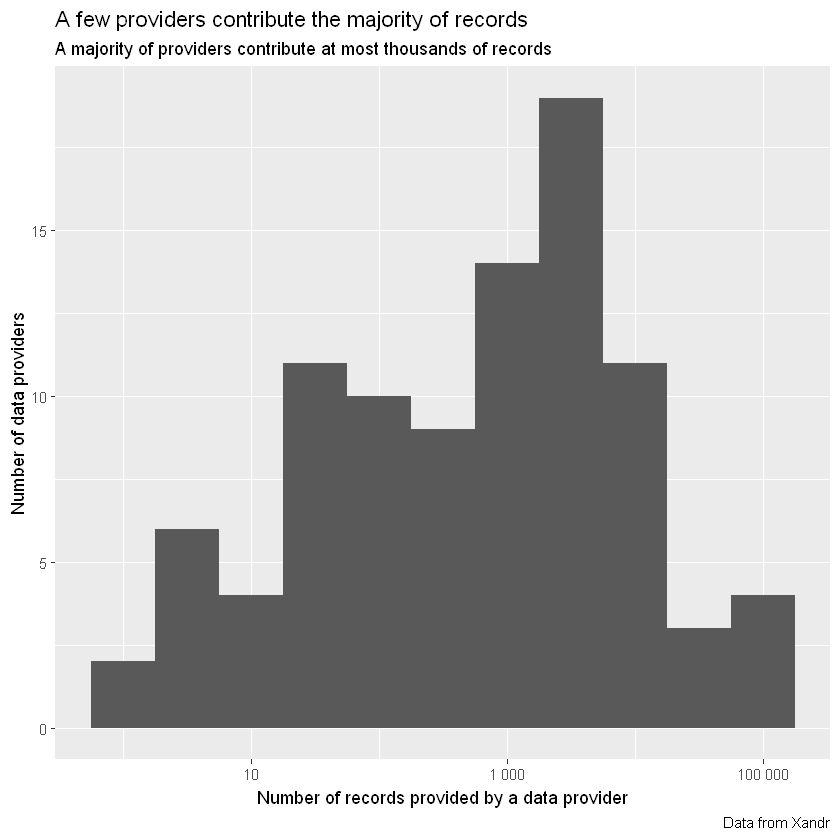

In [132]:
(providers_plot <- xandr_providers |>
   ggplot(aes(x=provided))+ geom_histogram(binwidth= 0.5)+ scale_x_log10(labels = label_number(suffix = ""), breaks = c(10,1000,100000))+ labs(
     title = "A few providers contribute the majority of records",
     subtitle = "A majority of providers contribute at most thousands of records",
     caption = "Data from Xandr", y="Number of data providers", x="Number of records provided by a data provider"
   ))

The data seem to be quite haphazardly put together.
We'll see that some `segment_name`s correspond to more than one `segment_id`s.

In [133]:
xandr_raw |>
  summarize(
    .by = segment_name,
    segment_ids = n_distinct(segment_id)
  ) |>
  filter(segment_ids > 1)

segment_name                                                                                                      
1     Ignore                                                                                                            
2     Infogroup - Political Executive Donor                                                                             
3     Qualia Intent_Mobile App: Healthy Living                                                                          
4     ShareThis > Food & Drink > Food > Snack Foods                                                                     
5     ShareThis > Food & Drink > Food > Organic & Natural Foods                                                         
6     ShareThis > Food & Drink > Food > Meat & Seafood                                                                  
7     ShareThis > Food & Drink > Food > Herbs & Spices                                                                  
8     ShareThis > Food & Drink > Food > Jams, Jellies & Preserves                                                       
9     ShareThis > Food & Drink > Food > Grains & Pasta                                                                  
10    ShareThis > Food & Drink > Food > Gourmet & Specialty Foods                                                       
11    ShareThis > Food & Drink > Food > Dairy & Eggs                                                                    
12    ShareThis > Food & Drink > Food > Fruits & Vegetables                                                             
13    ShareThis > Food & Drink > Food > Cooking Fats & Oils                                                             
14    ShareThis > Food & Drink > Food > Candy & Sweets                                                                  
15    ShareThis > Food & Drink > Food > Condiments & Dressings                                                          
16    ShareThis > Food & Drink > Food > Breakfast Foods                                                                 
17    ShareThis > Food & Drink > Food > Baked Goods                                                                     
18    ShareThis > Food & Drink > Food & Grocery Retailers > Farmers' Markets                                            
19    ShareThis > Food & Drink > Food & Grocery Retailers                                                               
20    ShareThis > Food & Drink > Food & Grocery Retailers > Convenience Stores                                          
21    ShareThis > Food & Drink > Cooking & Recipes > Healthy Eating                                                     
22    ShareThis > Food & Drink > Cooking & Recipes > Desserts                                                           
23    ShareThis > Food & Drink > Cooking & Recipes > Salads                                                             
24    ShareThis > Food & Drink > Cooking & Recipes > Soups & Stews                                                      
25    ShareThis > Food & Drink > Cooking & Recipes > Cuisines                                                           
26    ShareThis > Food & Drink > Cooking & Recipes                                                                      
27    ShareThis > Food & Drink > Beverages > Juice                                                                      
28    ShareThis > Food & Drink > Beverages > Soft Drinks                                                                
29    ShareThis > Food & Drink > Beverages > Bottled Water                                                              
30    ShareThis > Autos & Vehicles > Vehicle Shopping > Vehicle Specs, Reviews & Comparisons                            
⋮     ⋮                                                                                                                 
11651 PG - Audience 1 Healthcare+Seniority                                                                              
11652 WTX_El_

Among the list above, some rows have the same `segment_name`, as well as `data_provider_name`, and still have different `segment_id`s, as shown below.
This must be some kind of error.

In [134]:
xandr_raw |>
  summarize(
    .by = c(data_provider_name, segment_name),
    segment_ids = n_distinct(segment_id)
  ) |>
  filter(segment_ids > 1)

data_provider_name                               
1    Lotame                                           
2    Lotame                                           
3    Lotame                                           
4    Peer39                                           
5    Peer39                                           
6    Peer39                                           
7    Peer39                                           
8    Peer39                                           
9    Peer39                                           
10   KBM Group                                        
11   KBM Group                                        
12   KBM Group                                        
13   KBM Group                                        
14   KBM Group                                        
15   KBM Group                                        
16   KBM Group                                        
17   KBM Group                                        
18   KBM Group                                        
19   KBM Group                                        
20   KBM Group                                        
21   KBM Group                                        
22   Grapeshot                                        
23   Grapeshot                                        
24   Grapeshot                                        
25   Grapeshot                                        
26   Cross Pixel Media                                
27   Audiences by Oracle (BlueKai, Datalogix, AddThis)
28   Audiences by Oracle (BlueKai, Datalogix, AddThis)
29   Audiences by Oracle (BlueKai, Datalogix, AddThis)
30   Audiences by Oracle (BlueKai, Datalogix, AddThis)
⋮    ⋮                                                
9733 Bombora Inc.                                     
9734 Factual Inc                                      
9735 The ADEX GmbH                                    
9736 comScore Inc.                                    
9737 Adsquare (Data Provider)                         
9738 Adsquare (Data Provider)                         
9739 Adsquare (Data Provider)                         
9740 Adsquare (Data Provider)                         
9741 Bombora Inc.                                     
9742 Bombora Inc.                                     
9743 Bombora Inc.                                     
9744 Factual Inc                                      
9745 Bombora Inc.                                     
9746 Peer39                                           
9747 Bombora Inc.                                     
9748 Bombora Inc.                                     
9749 Dstillery                                        
9750 Dstillery                                        
9751 Factual Inc                                      
9752 Semcasting (Data Provider)                       
9753 Semcasting (Data Provider)                       
9754 Factual Inc                                      
9755 Bombora Inc.                                     
9756 Bombora Inc.                                     
9757 Bombora Inc.                                     
9758 Dstillery                                        
9759 Dstillery                                        
9760 Factual Inc                                      
9761 Factual Inc                                      
9762 Semcasting (Data Provider)                       
     segment_name                                                                                                      
1    Ignore                                                                                                            
2    Infogroup - Political Executive Donor                                                                             
3    Qualia Intent_Mobile App: Healthy Living                                                                          
4    Peer39: Custom Category>IPM-Peer39Custom-PAA Civil Rights                                                     

We can eliminate the duplication in the data, by picking the smaller `segment_id` number that correspond to the same `data_provider_name` and `segment_name`

In [135]:
(xandr_update1 <- xandr_raw|>
   summarise(.by = c(data_provider_name, segment_name), segment_id = min(segment_id, na.rm = TRUE))|>
   select(data_provider_name, segment_name,segment_id)
 )


data_provider_name          
1      Nielsen Marketing Cloud     
2      Nielsen Marketing Cloud     
3      Nielsen Marketing Cloud     
4      Nielsen Marketing Cloud     
5      Nielsen Marketing Cloud     
6      Nielsen Marketing Cloud     
7      Nielsen Marketing Cloud     
8      Nielsen Marketing Cloud     
9      Nielsen Marketing Cloud     
10     Nielsen Marketing Cloud     
11     Nielsen Marketing Cloud     
12     Nielsen Marketing Cloud     
13     Nielsen Marketing Cloud     
14     Nielsen Marketing Cloud     
15     Nielsen Marketing Cloud     
16     Nielsen Marketing Cloud     
17     Nielsen Marketing Cloud     
18     Nielsen Marketing Cloud     
19     Nielsen Marketing Cloud     
20     Nielsen Marketing Cloud     
21     Nielsen Marketing Cloud     
22     Nielsen Marketing Cloud     
23     Nielsen Marketing Cloud     
24     Nielsen Marketing Cloud     
25     Nielsen Marketing Cloud     
26     Nielsen Marketing Cloud     
27     Nielsen Marketing Cloud     
28     Nielsen Marketing Cloud     
29     Nielsen Marketing Cloud     
30     Nielsen Marketing Cloud     
⋮      ⋮                           
637729 Grapeshot                   
637730 Semasio GmbH (Data Provider)
637731 Semasio GmbH (Data Provider)
637732 Semasio GmbH (Data Provider)
637733 Semasio GmbH (Data Provider)
637734 LiveRamp Data Store         
637735 LiveRamp Data Store         
637736 LiveRamp Data Store         
637737 Peer39                      
637738 Peer39                      
637739 Peer39                      
637740 LiveRamp Data Store         
637741 LiveRamp Data Store         
637742 LiveRamp Data Store         
637743 LiveRamp Data Store         
637744 LiveRamp Data Store         
637745 LiveRamp Data Store         
637746 LiveRamp Data Store         
637747 LiveRamp Data Store         
637748 LiveRamp Data Store         
637749 LiveRamp Data Store         
637750 LiveRamp Data Store         
637751 LiveRamp Data Store         
637752 LiveRamp Data Store         
637753 LiveRamp Data Store         
637754 Crossix                     
637755 Crossix                     
637756 Crossix                     
637757 Crossix                     
637758 Crossix                     
       segment_name                                                                                                                                             
1      Consumer Targets - Interests - Auto and Other Vehicles - Makes and Models - Makes - Hyundai (Exelate)                                                    
2      Consumer Targets - Interests - Auto and Other Vehicles - Makes and Models - Makes - Aston Martin (Exelate)                                               
3      Consumer Targets - Custom Characteristics - Software - Browsers - Firefox (Exelate)                                                                      
4      Consumer Targets - Custom Characteristics (Exelate)                                                                                                      
5      Bombora B2B Intent Signals - Human Resources - Recruitment, Hiring and Onboarding                                                                        
6      B2B Targets - Seniority - Support (Exelate)                                                                                                              
7      B2B Targets - Industry - Wholesale - Durable Goods (Exelate)                                                                                             
8      B2B Targets - Industry - Manufacturing - Petroleum and Petroleum Related (Exelate)                                                                       
9      Tech Targets - From WhoToo - Industry - Manufacturing - Petroleum and Petroleum Related (Exelate)                                                        
10     Tech Targets - From WhoToo - Industry - Manufacturing - Auto (Exelate)                                                                                   
11  

We verify that indeed there is no longer spurious duplications.

In [136]:
xandr_update1 |>
  summarize(
    .by = c(data_provider_name, segment_name),
    segment_ids = n_distinct(segment_id)
  ) |>
  filter(segment_ids > 1)

data_provider_name segment_name segment_ids

Let's try the key words `Retail Visit` to see if any data provider has targeted a segment of population related to it.
We need to make sure that the capitalization does not matter, i.e. the search result would also include `retail visit` and `RETAIL VISIT` in the `segment_name`, for instance.

In [137]:
visit_keywords <- "Retail Visit"

(retail_visit_target <- xandr_update1|>
  
    filter(str_detect(segment_name,regex(visit_keywords, ignore_case=TRUE)))
)

data_provider_name                               
1  Audiences by Oracle (BlueKai, Datalogix, AddThis)
2  Audiences by Oracle (BlueKai, Datalogix, AddThis)
3  Audiences by Oracle (BlueKai, Datalogix, AddThis)
4  Audiences by Oracle (BlueKai, Datalogix, AddThis)
5  Audiences by Oracle (BlueKai, Datalogix, AddThis)
6  Audiences by Oracle (BlueKai, Datalogix, AddThis)
7  Audiences by Oracle (BlueKai, Datalogix, AddThis)
8  Audiences by Oracle (BlueKai, Datalogix, AddThis)
9  Audiences by Oracle (BlueKai, Datalogix, AddThis)
10 Audiences by Oracle (BlueKai, Datalogix, AddThis)
11 Audiences by Oracle (BlueKai, Datalogix, AddThis)
12 Audiences by Oracle (BlueKai, Datalogix, AddThis)
13 Audiences by Oracle (BlueKai, Datalogix, AddThis)
14 Audiences by Oracle (BlueKai, Datalogix, AddThis)
15 Audiences by Oracle (BlueKai, Datalogix, AddThis)
16 Audiences by Oracle (BlueKai, Datalogix, AddThis)
17 Audiences by Oracle (BlueKai, Datalogix, AddThis)
18 Audiences by Oracle (BlueKai, Datalogix, AddThis)
19 Audiences by Oracle (BlueKai, Datalogix, AddThis)
20 Audiences by Oracle (BlueKai, Datalogix, AddThis)
21 Audiences by Oracle (BlueKai, Datalogix, AddThis)
22 Audiences by Oracle (BlueKai, Datalogix, AddThis)
23 Audiences by Oracle (BlueKai, Datalogix, AddThis)
24 Audiences by Oracle (BlueKai, Datalogix, AddThis)
25 Audiences by Oracle (BlueKai, Datalogix, AddThis)
26 Audiences by Oracle (BlueKai, Datalogix, AddThis)
27 Audiences by Oracle (BlueKai, Datalogix, AddThis)
28 Audiences by Oracle (BlueKai, Datalogix, AddThis)
29 Audiences by Oracle (BlueKai, Datalogix, AddThis)
30 Audiences by Oracle (BlueKai, Datalogix, AddThis)
⋮  ⋮                                                
68 Audiences by Oracle (BlueKai, Datalogix, AddThis)
69 Audiences by Oracle (BlueKai, Datalogix, AddThis)
70 Audiences by Oracle (BlueKai, Datalogix, AddThis)
71 Audiences by Oracle (BlueKai, Datalogix, AddThis)
72 Audiences by Oracle (BlueKai, Datalogix, AddThis)
73 Audiences by Oracle (BlueKai, Datalogix, AddThis)
74 Audiences by Oracle (BlueKai, Datalogix, AddThis)
75 Audiences by Oracle (BlueKai, Datalogix, AddThis)
76 Audiences by Oracle (BlueKai, Datalogix, AddThis)
77 Audiences by Oracle (BlueKai, Datalogix, AddThis)
78 Audiences by Oracle (BlueKai, Datalogix, AddThis)
79 Audiences by Oracle (BlueKai, Datalogix, AddThis)
80 LiveRamp Data Store                              
81 LiveRamp Data Store                              
82 LiveRamp Data Store                              
83 Audiences by Oracle (BlueKai, Datalogix, AddThis)
84 Audiences by Oracle (BlueKai, Datalogix, AddThis)
85 Audiences by Oracle (BlueKai, Datalogix, AddThis)
86 Audiences by Oracle (BlueKai, Datalogix, AddThis)
87 Audiences by Oracle (BlueKai, Datalogix, AddThis)
88 Audiences by Oracle (BlueKai, Datalogix, AddThis)
89 Audiences by Oracle (BlueKai, Datalogix, AddThis)
90 Audiences by Oracle (BlueKai, Datalogix, AddThis)
91 Audiences by Oracle (BlueKai, Datalogix, AddThis)
92 Audiences by Oracle (BlueKai, Datalogix, AddThis)
93 Audiences by Oracle (BlueKai, Datalogix, AddThis)
94 Audiences by Oracle (BlueKai, Datalogix, AddThis)
95 Audiences by Oracle (BlueKai, Datalogix, AddThis)
96 Audiences by Oracle (BlueKai, Datalogix, AddThis)
97 Audiences by Oracle (BlueKai, Datalogix, AddThis)
   segment_name                                                                                                                                      
1  Branded Data > Gravy Analytics > Lifestyle > Visitation > Recent Retail Visit by Shopper > Recent Warehouse Store Visitor (BlueKai)               
2  Branded Data > Gravy Analytics > Lifestyle > Visitation > Recent Retail Visit by Shopper (BlueKai)                                                
3  Branded Data > Gravy Analytics > Lifestyle > Visitation > Recent Retail Visit by Shopper > Recent Warehouse Store Visitor > Sam's Club (BlueKai)  
4  Branded Data > Gravy Analytics > Lifestyle > Visitation > Recent Retail Visit by Shopper > Recent Warehouse Store 

The segment names are too long, and contain too much information in one piece.
They need to be separated into multiple columns.
The ones in the resulting list above seem to be all broken into sections by `>`.
Use separate by deliminator to split the column into `level_1`, `level_2` ... and `level_7`.
If a row has less than `7` pieces in `segment_name`, fill the it with `NA` on the right; while if a row has more than `7` pieces in `segment_name`, drop the extra pieces.
Again, trimming the resulting pieces is a good idea.

In [138]:
levelss <-c("level_1", "level_2", "level_3", "level_4", "level_5", "level_6", "level_7")
(retail_visit_target_sep <- retail_visit_target|>
     separate_wider_delim(segment_name, delim = ">", names = levelss,
     too_many = "merge",
     too_few = "align_start")|>
   mutate(
     across(where(is.character), str_trim)
   )
)

data_provider_name                                level_1     
1  Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
2  Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
3  Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
4  Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
5  Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
6  Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
7  Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
8  Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
9  Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
10 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
11 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
12 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
13 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
14 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
15 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
16 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
17 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
18 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
19 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
20 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
21 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
22 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
23 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
24 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
25 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
26 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
27 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
28 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
29 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
30 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
⋮  ⋮                                                 ⋮           
68 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
69 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
70 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
71 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
72 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
73 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
74 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
75 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
76 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
77 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
78 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
79 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
80 LiveRamp Data Store                               Gravy       
81 LiveRamp Data Store                               Gravy       
82 LiveRamp Data Store                               Gravy       
83 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
84 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
85 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
86 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
87 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
88 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
89 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
90 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
91 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
92 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
93 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
94 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
95 Audiences by Oracle (BlueKai, Datalogix, AddThis) Branded Data
96 Audiences by Oracle (BlueKai, Datalogix,

There are not many rows in the above and we can simply go through them all.
It seems they came mainly from two sources `Audiences by Oracle` and `LiveRamp` --- which are the top two contributors.
Looking at `level_6`, it shows that there are quite a bit of details --- the data providers, hence the advertisers, seem to know if people go to some of the popular stores.
Also some further separation might be useful, since there are values like `Recent Retail Visit by Shopper - DHL (BlueKai)` (in row $77$), which could be split by `-`.

We can use a shorter keyword `Retail` to capture more data.

In [139]:
keywords <- "Retail"
(retail_target <- xandr_update1|>
    filter(row_number() %in% str_which(segment_name, regex(keywords, ignore_case = TRUE)))
)

data_provider_name                               
1     Nielsen Marketing Cloud                          
2     Nielsen Marketing Cloud                          
3     Nielsen Marketing Cloud                          
4     Nielsen Marketing Cloud                          
5     Nielsen Marketing Cloud                          
6     Nielsen Marketing Cloud                          
7     Nielsen Marketing Cloud                          
8     Nielsen Marketing Cloud                          
9     Nielsen Marketing Cloud                          
10    Nielsen Marketing Cloud                          
11    Nielsen Marketing Cloud                          
12    Nielsen Marketing Cloud                          
13    Nielsen Marketing Cloud                          
14    Nielsen Marketing Cloud                          
15    Nielsen Marketing Cloud                          
16    Nielsen Marketing Cloud                          
17    Nielsen Marketing Cloud                          
18    Nielsen Marketing Cloud                          
19    Nielsen Marketing Cloud                          
20    Nielsen Marketing Cloud                          
21    Nielsen Marketing Cloud                          
22    Nielsen Marketing Cloud                          
23    Nielsen Marketing Cloud                          
24    Nielsen Marketing Cloud                          
25    Nielsen Marketing Cloud                          
26    Nielsen Marketing Cloud                          
27    AdAdvisor by Neustar                             
28    AdAdvisor by Neustar                             
29    AdAdvisor by Neustar                             
30    AdAdvisor by Neustar                             
⋮     ⋮                                                
31589 LiveRamp Data Store                              
31590 LiveRamp Data Store                              
31591 LiveRamp Data Store                              
31592 LiveRamp Data Store                              
31593 LiveRamp Data Store                              
31594 LiveRamp Data Store                              
31595 LiveRamp Data Store                              
31596 LiveRamp Data Store                              
31597 LiveRamp Data Store                              
31598 LiveRamp Data Store                              
31599 LiveRamp Data Store                              
31600 LiveRamp Data Store                              
31601 LiveRamp Data Store                              
31602 LiveRamp Data Store                              
31603 LiveRamp Data Store                              
31604 LiveRamp Data Store                              
31605 LiveRamp Data Store                              
31606 LiveRamp Data Store                              
31607 LiveRamp Data Store                              
31608 LiveRamp Data Store                              
31609 LiveRamp Data Store                              
31610 LiveRamp Data Store                              
31611 Audiences by Oracle (BlueKai, Datalogix, AddThis)
31612 LiveRamp Data Store                              
31613 Semasio GmbH (Data Provider)                     
31614 Semcasting (Data Provider)                       
31615 Bombora Inc.                                     
31616 Bombora Inc.                                     
31617 Audiences by Oracle (BlueKai, Datalogix, AddThis)
31618 Semasio GmbH (Data Provider)                     
      segment_name                                                                                                      
1     B2B Targets - Industry - Retail - Jewelry (Exelate)                                                               
2     B2B Targets - Industry - Retail - Office Products (Exelate)                                                       
3     B2B Targets - Industry - Retail - Pet Products (Exelate)                                                          
4     B2B Targets - Industry - Retail - Home Furni

Indeed, there are `31618` rows which one cannot go through directly.
Nonetheless, looking at a few segment names shows the surprising information that advertisers can gather.
For instance, those provided by `AdAdvisor by Neustar` even have time information, such as `Lst 3M` v.s.
`Lst 4Wk`.

In [140]:
retail_target |>
  filter(data_provider_name == "AdAdvisor by Neustar")

data_provider_name  
1   AdAdvisor by Neustar
2   AdAdvisor by Neustar
3   AdAdvisor by Neustar
4   AdAdvisor by Neustar
5   AdAdvisor by Neustar
6   AdAdvisor by Neustar
7   AdAdvisor by Neustar
8   AdAdvisor by Neustar
9   AdAdvisor by Neustar
10  AdAdvisor by Neustar
11  AdAdvisor by Neustar
12  AdAdvisor by Neustar
13  AdAdvisor by Neustar
14  AdAdvisor by Neustar
15  AdAdvisor by Neustar
16  AdAdvisor by Neustar
17  AdAdvisor by Neustar
18  AdAdvisor by Neustar
19  AdAdvisor by Neustar
20  AdAdvisor by Neustar
21  AdAdvisor by Neustar
22  AdAdvisor by Neustar
23  AdAdvisor by Neustar
24  AdAdvisor by Neustar
25  AdAdvisor by Neustar
26  AdAdvisor by Neustar
27  AdAdvisor by Neustar
28  AdAdvisor by Neustar
29  AdAdvisor by Neustar
30  AdAdvisor by Neustar
⋮   ⋮                   
84  AdAdvisor by Neustar
85  AdAdvisor by Neustar
86  AdAdvisor by Neustar
87  AdAdvisor by Neustar
88  AdAdvisor by Neustar
89  AdAdvisor by Neustar
90  AdAdvisor by Neustar
91  AdAdvisor by Neustar
92  AdAdvisor by Neustar
93  AdAdvisor by Neustar
94  AdAdvisor by Neustar
95  AdAdvisor by Neustar
96  AdAdvisor by Neustar
97  AdAdvisor by Neustar
98  AdAdvisor by Neustar
99  AdAdvisor by Neustar
100 AdAdvisor by Neustar
101 AdAdvisor by Neustar
102 AdAdvisor by Neustar
103 AdAdvisor by Neustar
104 AdAdvisor by Neustar
105 AdAdvisor by Neustar
106 AdAdvisor by Neustar
107 AdAdvisor by Neustar
108 AdAdvisor by Neustar
109 AdAdvisor by Neustar
110 AdAdvisor by Neustar
111 AdAdvisor by Neustar
112 AdAdvisor by Neustar
113 AdAdvisor by Neustar
    segment_name                                                                                                          
1   Technology & Computing > Photo Printing > Print Digital Photo At A Retail Store(Walgreens, Etc)                       
2   Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at Amazon                                             
3   Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at ITunes Store                                       
4   Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at Apple Store                                        
5   Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at Best Buy                                           
6   Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at Ebay                                               
7   Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at Groupon                                            
8   Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at Macy's                                             
9   Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at Target                                             
10  Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at Ticketmaster                                       
11  Neustar AdAdvisor > Retail > Centers and Malls > Shopped Online at Walmart                                            
12  Neustar AdAdvisor > Retail > Stores > Shopped Kids Foot Locker Last 3M                                                
13  Neustar AdAdvisor > Retail > Stores > Shopped J. Crew Last 3M                                                         
14  Neustar AdAdvisor > Retail > Stores > Shop Giant Eagle Lst 4Wk                                                        
15  Neustar AdAdvisor > Retail > Stores > Shop H.E.B. Pantry 4-9 Times Lst 4Wk                                            
16  Neustar AdAdvisor > Retail > Stores > Shop Safeway 4-9 Times Lst 4Wk                                                  
17  Neustar AdAdvisor > Retail > Stores > Shop Trader Joe's 4-9 Times Lst 4Wk                                             
18  Neustar AdAdvisor > Retail > Stores > Shop Vons 1-3 Times Lst 4Wk                                                     
19  Neustar AdAdvisor > Retail > Stores > Shopped Sunglass Hut Last 3M                                               

Let's look at another keyword, this time is `Taylor Swift`, just to finish this project.

In [141]:
keywords <- "Taylor Swift"
(entertain_target <- xandr_update1|>
    filter(row_number() %in% str_which(segment_name, regex(keywords, ignore_case = TRUE)))
)
rmarkdown::render("path/to/yourfile.Rmd", output_format = "all")

data_provider_name                               
1 Audiences by Oracle (BlueKai, Datalogix, AddThis)
2 Audiences by Oracle (BlueKai, Datalogix, AddThis)
3 LiveRamp Data Store                              
4 LiveRamp Data Store                              
5 Eyeota                                           
6 Audiences by Oracle (BlueKai, Datalogix, AddThis)
7 comScore Inc.                                    
  segment_name                                                                                         
1 Branded Data > Affinity Answers > Music > Rock, Pop, & Country > Taylor Swift (BlueKai)              
2 Branded Data > Alliant > Interest Propensities > Celebrities > Taylor Swift (BlueKai)                
3 180byTWO > OTT > Music > Artist > Taylor Swift                                                       
4 Alliant > Interest Propensities > Celebrities > Taylor Swift                                         
5 Eyeota - US 180byTwo - OTT - Music - Artist - Taylor Swift                                           
6 Branded Data > StatSocial > Influencers > Influencer Audiences > Celebrities > Taylor Swift (BlueKai)
7 Artist - Taylor Swift (Proximic Agent)                                                               
  segment_id
1  6291138  
2 12728432  
3 15897478  
4 13071380  
5 19036482  
6 19316767  
7 24626012

Warning message in readLines(con, warn = FALSE):
"cannot open file 'path/to/yourfile.Rmd': No such file or directory"


ERROR: Error in readLines(con, warn = FALSE): cannot open the connection
